In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import utils_6x2 as util
import utils_ppd as ppd
import utils_ppd_plots as ppd_plots
import utils_ppd_calib as calib
from astropy.io import fits


In [4]:
path_ppd = '../'
path_chain = '../../trimmed_chains/'
path_dv = '../../../data/des-y3/'
# DATAFILE = '2pt_NG_final_2ptunblind_02_24_21_wnz_covupdate.v2.fits'
# fiducial_dv='2pt_NG_final_2ptunblind_02_24_21_wnz_covupdate.v2.fits'
DATAFILE = '2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits'
fiducial_dv = '2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits'

In [5]:
main_subsets = ['full', '1x2', '2x2', 'xip', 'xim', 'gammat', 'wtheta']

# 1x2_largescales_vs_1x2_smallscales

In [5]:
RUN_NAME = '1x2_smallscales_ML'
RUN_NAME_PPD = '1x2_largescales_vs_1x2_smallscales'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    like_module='2pt_dprime_like',
    data_sets=['xip', 'xim'],
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2_smallscales_ML.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'intrinsic_alignment_parameters--a1', 'intrinsic_alignment_parameters--a2', 'intrinsic_alignment_parameters--alpha1', 


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2_smallscales_ML.txt
Loading list chain at
../1x2_largescales_vs_1x2_smallscales/ppd_chain_1x2_smallscales_ML_1x2_largescales_vs_1x2_smallscales.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)], 'wtheta': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 

/global/cfs/cdirs/des/xuod/DES_Y3_3x2/y3-3x2pt/code/ppd/postprocessing/utils_ppd_calib.py:77: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, F))
  return np.dot(A,B)



###############################
## Compute IS weights for d ###
###############################
 - Number of sims DV =  1
 - Number of chain DV =  11792
 - Dimension of DV =  97
(11792, 10000)
Neff = 178.8 (median), 16th=54.0, 84th=505.3 (0 were nan's)

###############################
## Computing p-values #########
###############################
Full
 - Number of sims DV =  10000
 - Number of chain DV =  11792
 - Dimension of DV =  130
 - Number of sims DV =  10000
 - Number of chain DV =  11792
 - Dimension of DV (d+d') =  227
 - Dimension of DV (d) =  97
1x2
get_chi2_resample_cond
 - Number of sims DV =  10000
 - Number of chain DV =  11792
 - Dimension of DV (d+d') =  227
 - Dimension of DV (d) =  97
get_chi2_rsd
 - Number of sims DV =  10000
 - Number of chain DV =  11792
 - Dimension of DV =  130
xim
get_chi2_resample_cond
 - Number of sims DV =  10000
 - Number of chain DV =  11792
 - Dimension of DV (d+d') =  137
 - Dimension of DV (d) =  97
get_chi2_rsd
 - Number of sims DV 

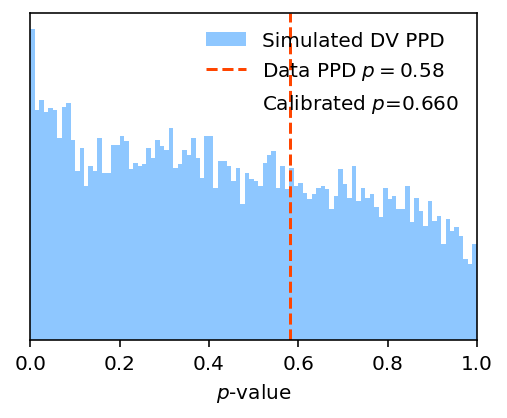

In [6]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim'],
    data_sets_dprime=['xip','xim'],
    N=10000,
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    sample_from='best-fit'
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2
## Observable p-value
-  xip p=0.580291


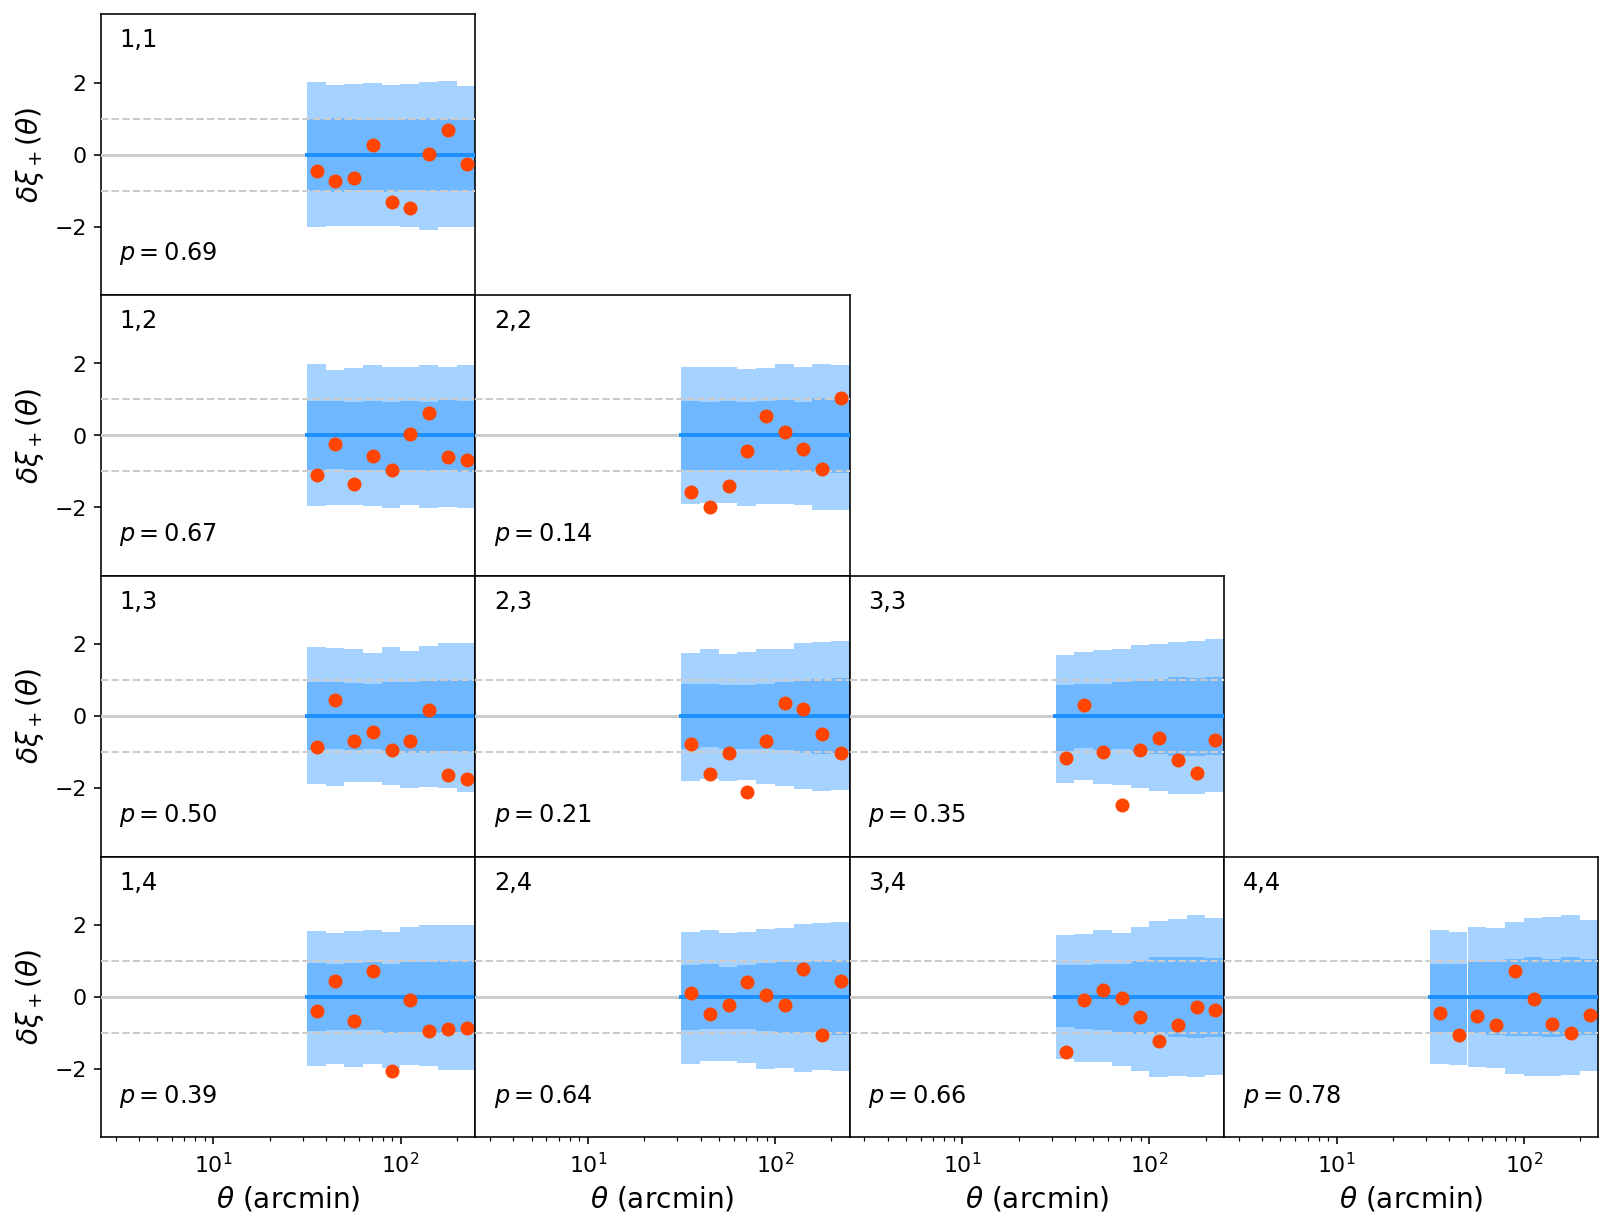

Using DV.fits covariance for chi2
## Observable p-value
-  xim p=0.391780


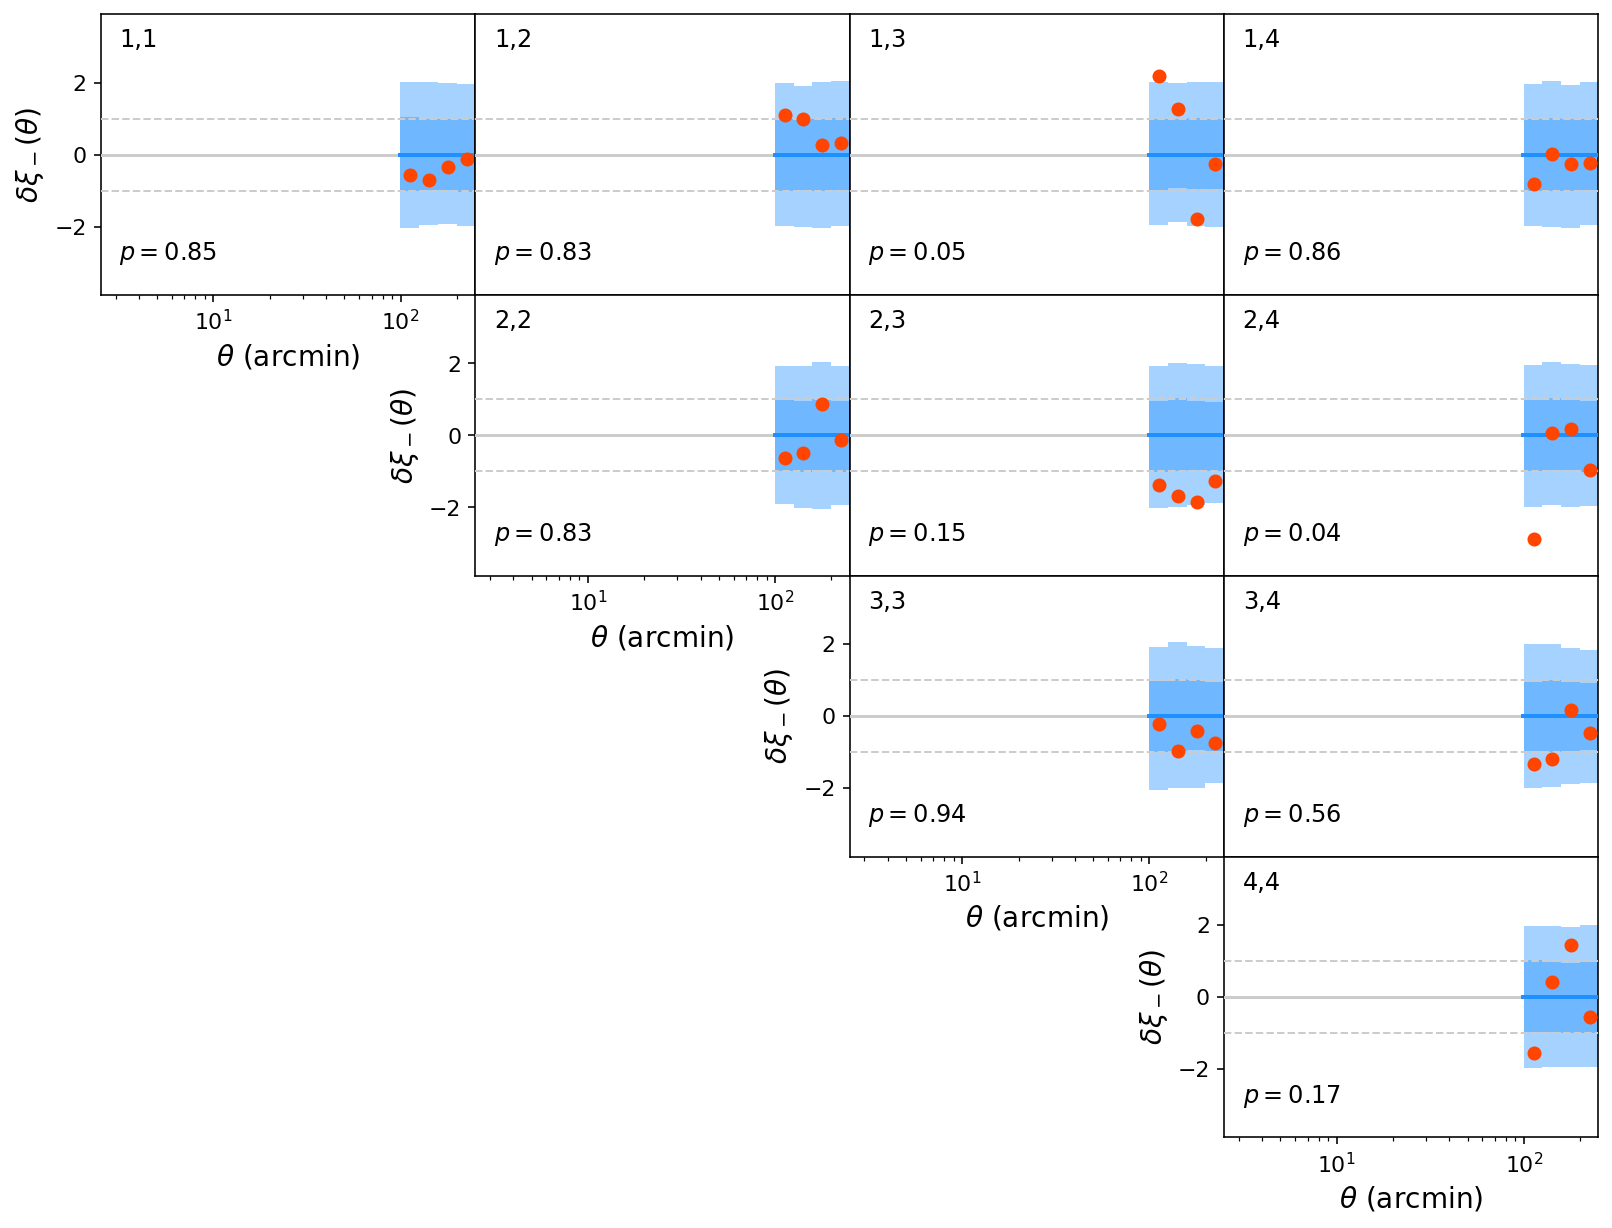

In [7]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal)

# 1x2_smallscales_vs_1x2_largescales

In [8]:
RUN_NAME = '1x2_largescales_ML'
RUN_NAME_PPD = '1x2_smallscales_vs_1x2_largescales'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    like_module='2pt_dprime_like',
    data_sets=['xip', 'xim'],
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2_largescales_ML.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'intrinsic_alignment_parameters--a1', 'intrinsic_alignment_parameters--a2', 'intrinsic_alignment_parameters--alpha1', 


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2_largescales_ML.txt
Loading list chain at
../1x2_smallscales_vs_1x2_largescales/ppd_chain_1x2_largescales_ML_1x2_smallscales_vs_1x2_largescales.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)], 'wtheta': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 

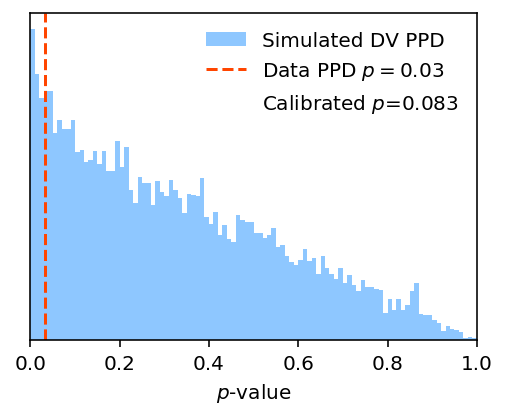

In [9]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim'],
    data_sets_dprime=['xip','xim'],
    N=10000,
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    sample_from='best-fit'
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2
## Observable p-value
-  xip p=0.028001


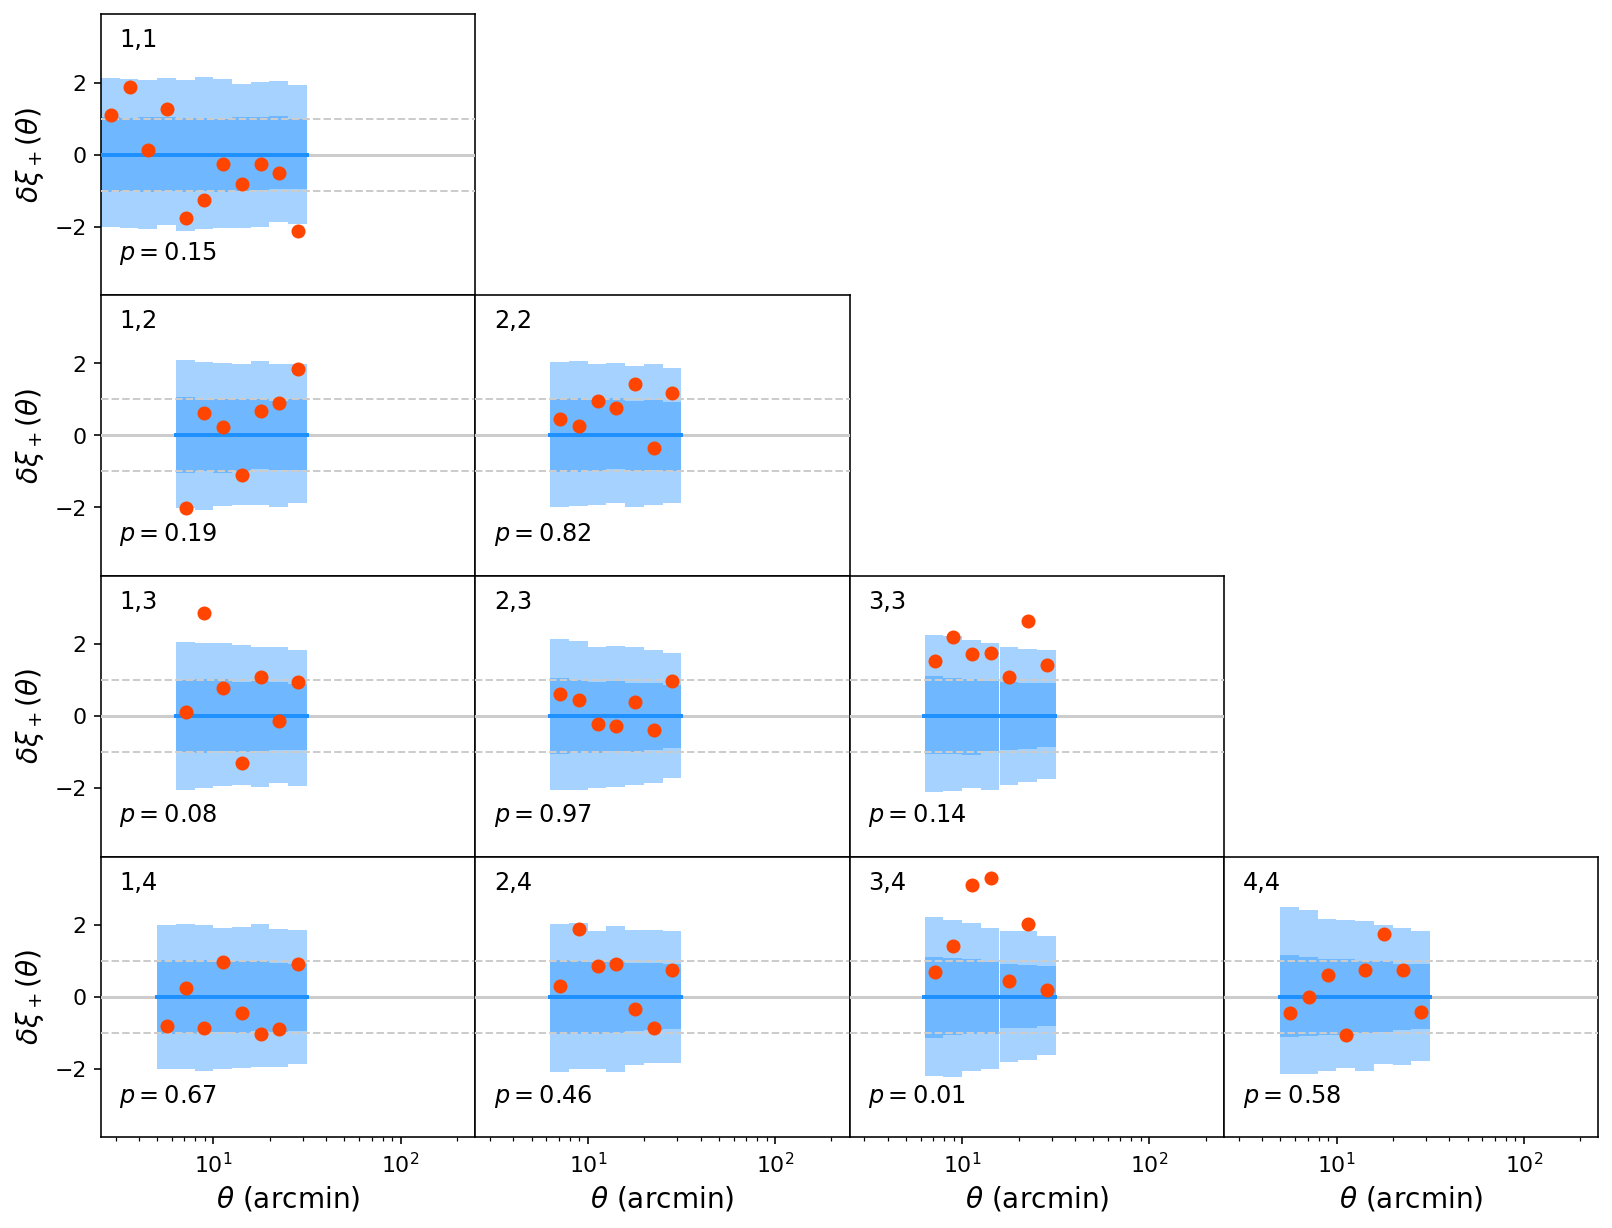

Using DV.fits covariance for chi2
## Observable p-value
-  xim p=0.257007


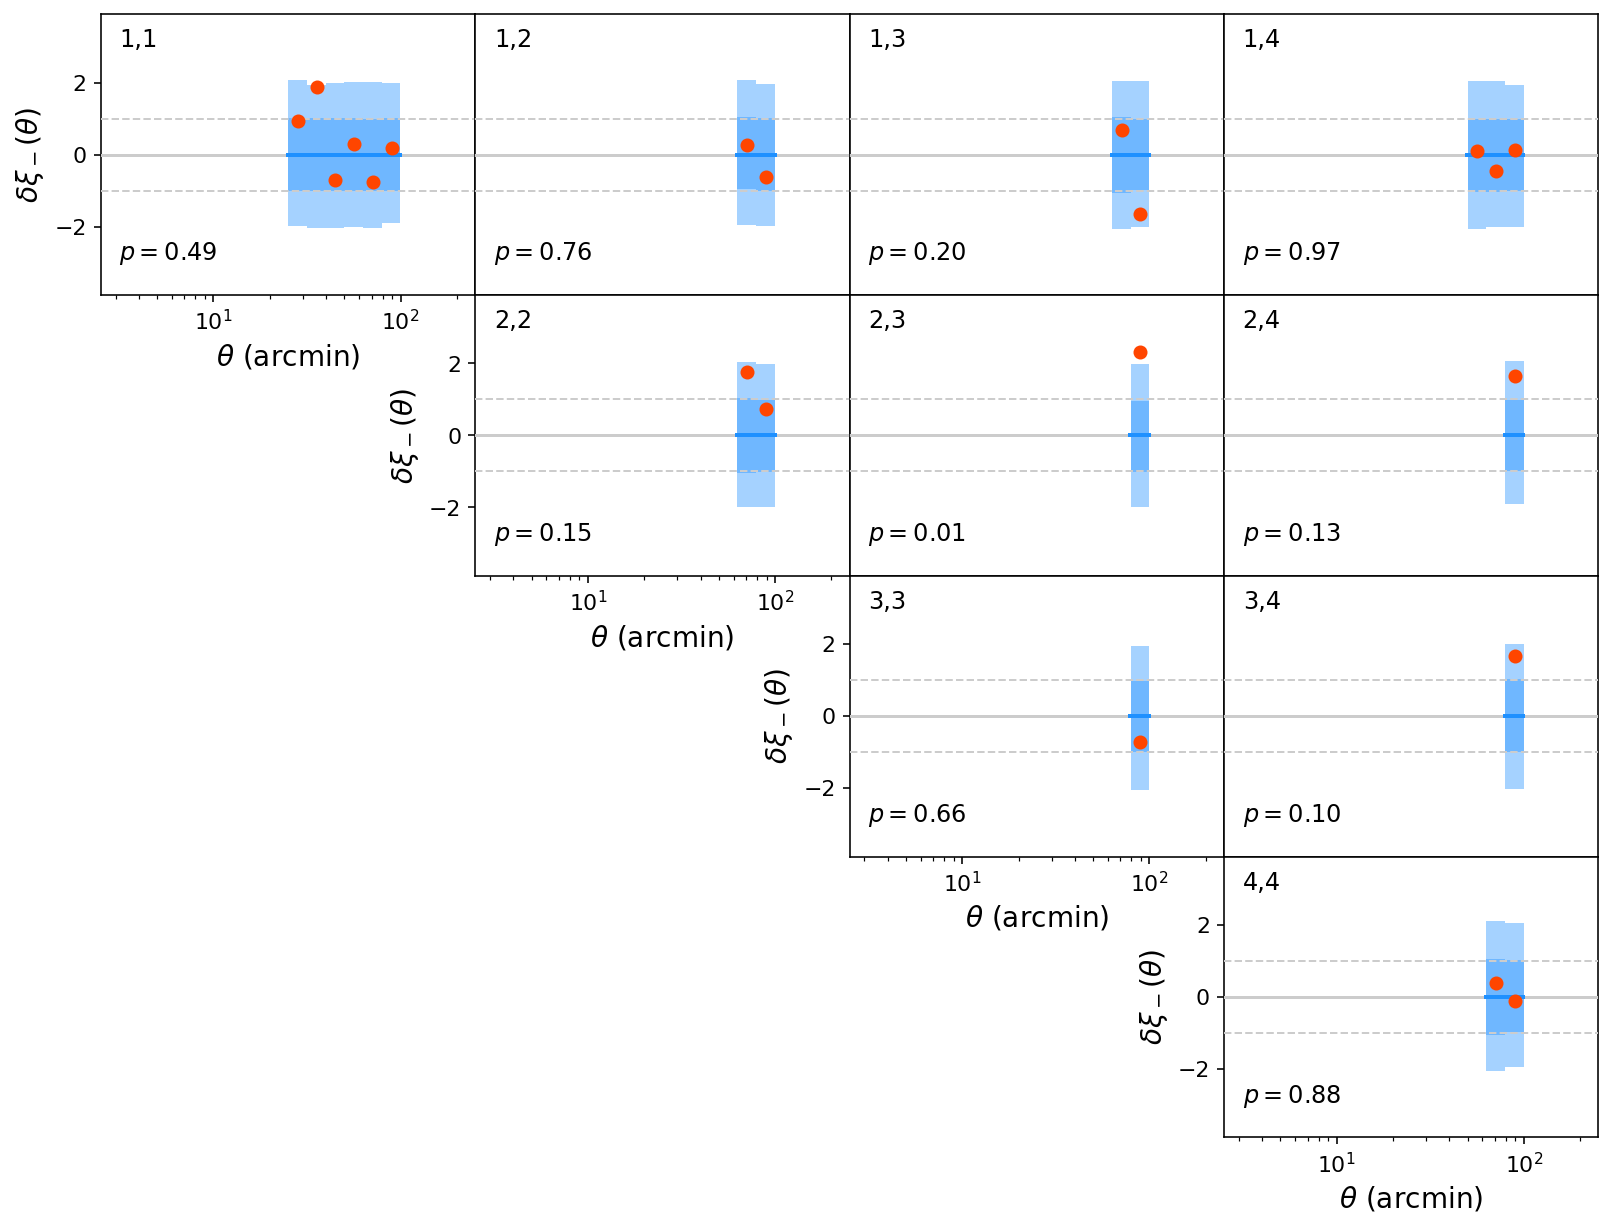

In [10]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal)

# 1x2_xim_vs_1x2_xip

In [6]:
RUN_NAME = 'xiponly_ML'
RUN_NAME_PPD = '1x2_xim_vs_1x2_xip'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    like_module='2pt_dprime_like',
    data_sets=['xim'],
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_xiponly_ML.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'intrinsic_alignment_parameters--a1', 'intrinsic_alignment_parameters--a2', 'intrinsic_alignment_parameters--alpha1', 'intrins


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_xiponly_ML.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)], 'wtheta': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 3), (3, 4), (3, 5), (3, 6), (4, 4), (4, 5), (4, 6), (5, 5), (5, 6), (6, 6)]}
Getting indices for xip

Found obse

/global/cfs/cdirs/des/xuod/DES_Y3_3x2/y3-3x2pt/code/ppd/postprocessing/utils_ppd_calib.py:77: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, F))
  return np.dot(A,B)



###############################
## Compute IS weights for d ###
###############################
(12392, 10000)
Neff = 121.1 (median), 16th=37.8, 84th=377.8 (0 were nan's)

###############################
## Computing p-values #########
###############################
Full
xim
get_chi2_resample_cond
get_chi2_rsd
xim_1_1
get_chi2_resample_cond
get_chi2_rsd
Appending pval for xim_1_1 0.7489256446718019
xim_1_2
get_chi2_resample_cond
get_chi2_rsd
Appending pval for xim_1_2 0.8827496668682103
xim_1_3
get_chi2_resample_cond
get_chi2_rsd
Appending pval for xim_1_3 0.02354313960046794
xim_1_4
get_chi2_resample_cond
get_chi2_rsd
Appending pval for xim_1_4 0.89410373833672
xim_2_2
get_chi2_resample_cond
get_chi2_rsd
Appending pval for xim_2_2 0.7340628390860805
xim_2_3
get_chi2_resample_cond
get_chi2_rsd
Appending pval for xim_2_3 0.053352752839696024
xim_2_4
get_chi2_resample_cond
get_chi2_rsd
Appending pval for xim_2_4 0.04563219193130324
xim_3_3
get_chi2_resample_cond
get_chi2_rsd
Appending 

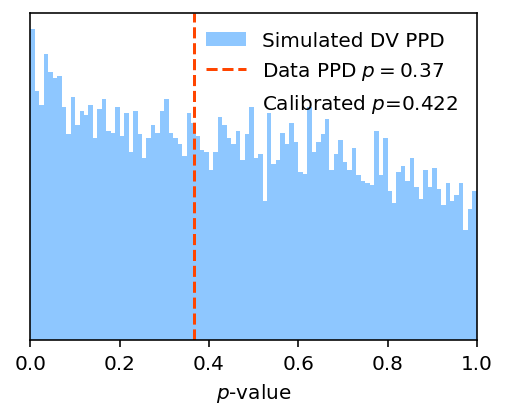

In [7]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip'],
    data_sets_dprime=['xim'],
    N=10000,
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    sample_from='best-fit',
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2
## Observable p-value
-  xim p=0.368017


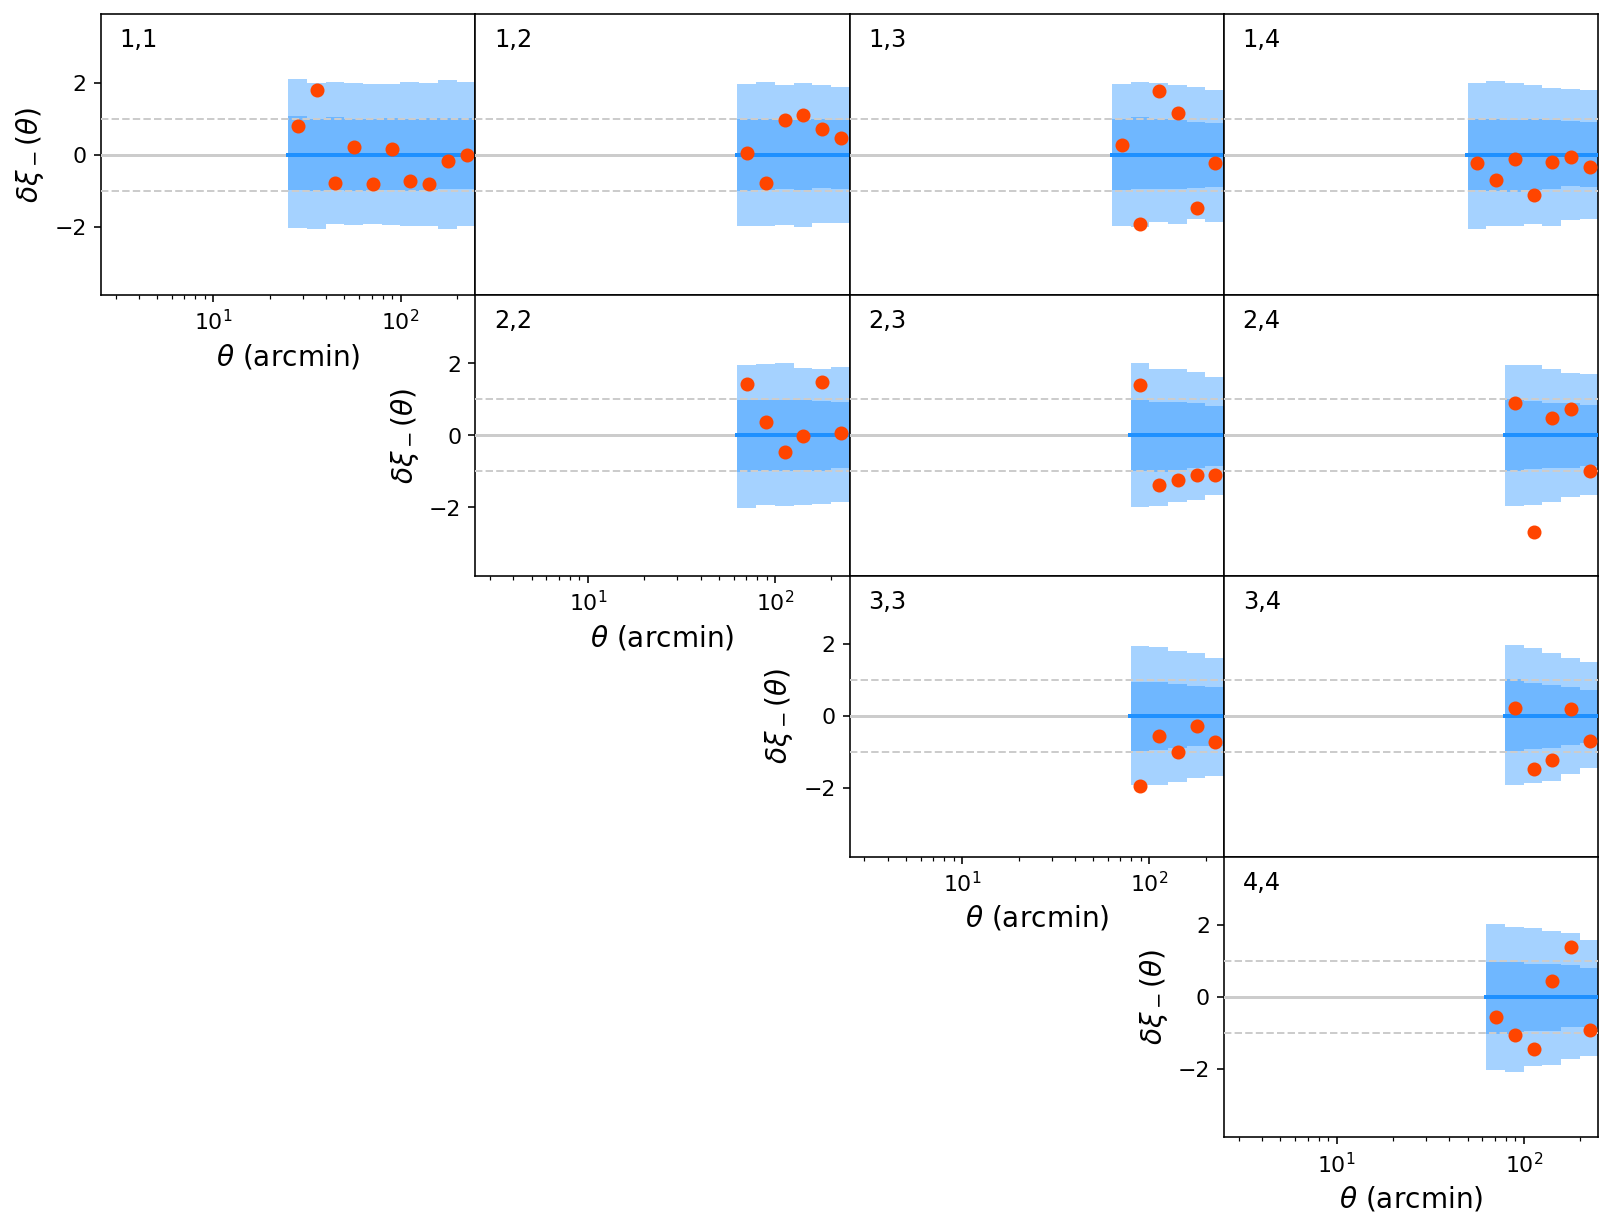

In [8]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal)

# 1x2_xip_vs_1x2_xim

In [9]:
RUN_NAME = 'ximonly_ML'
RUN_NAME_PPD = '1x2_xip_vs_1x2_xim'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    like_module='2pt_dprime_like',
    data_sets=['xip'],
)

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_ximonly_ML.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'intrinsic_alignment_parameters--a1', 'intrinsic_alignment_parameters--a2', 'intrinsic_alignment_parameters--alpha1', 'intrins


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_ximonly_ML.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)], 'wtheta': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 3), (3, 4), (3, 5), (3, 6), (4, 4), (4, 5), (4, 6), (5, 5), (5, 6), (6, 6)]}
Getting indices for xim

Found obse

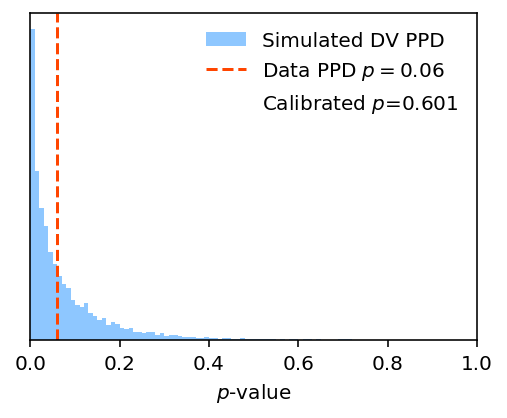

In [10]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xim'],
    data_sets_dprime=['xip'],
    N=10000,
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    sample_from='best-fit'
)[-1]

Using DV.fits covariance for chi2
## Observable p-value
-  xip p=0.066012


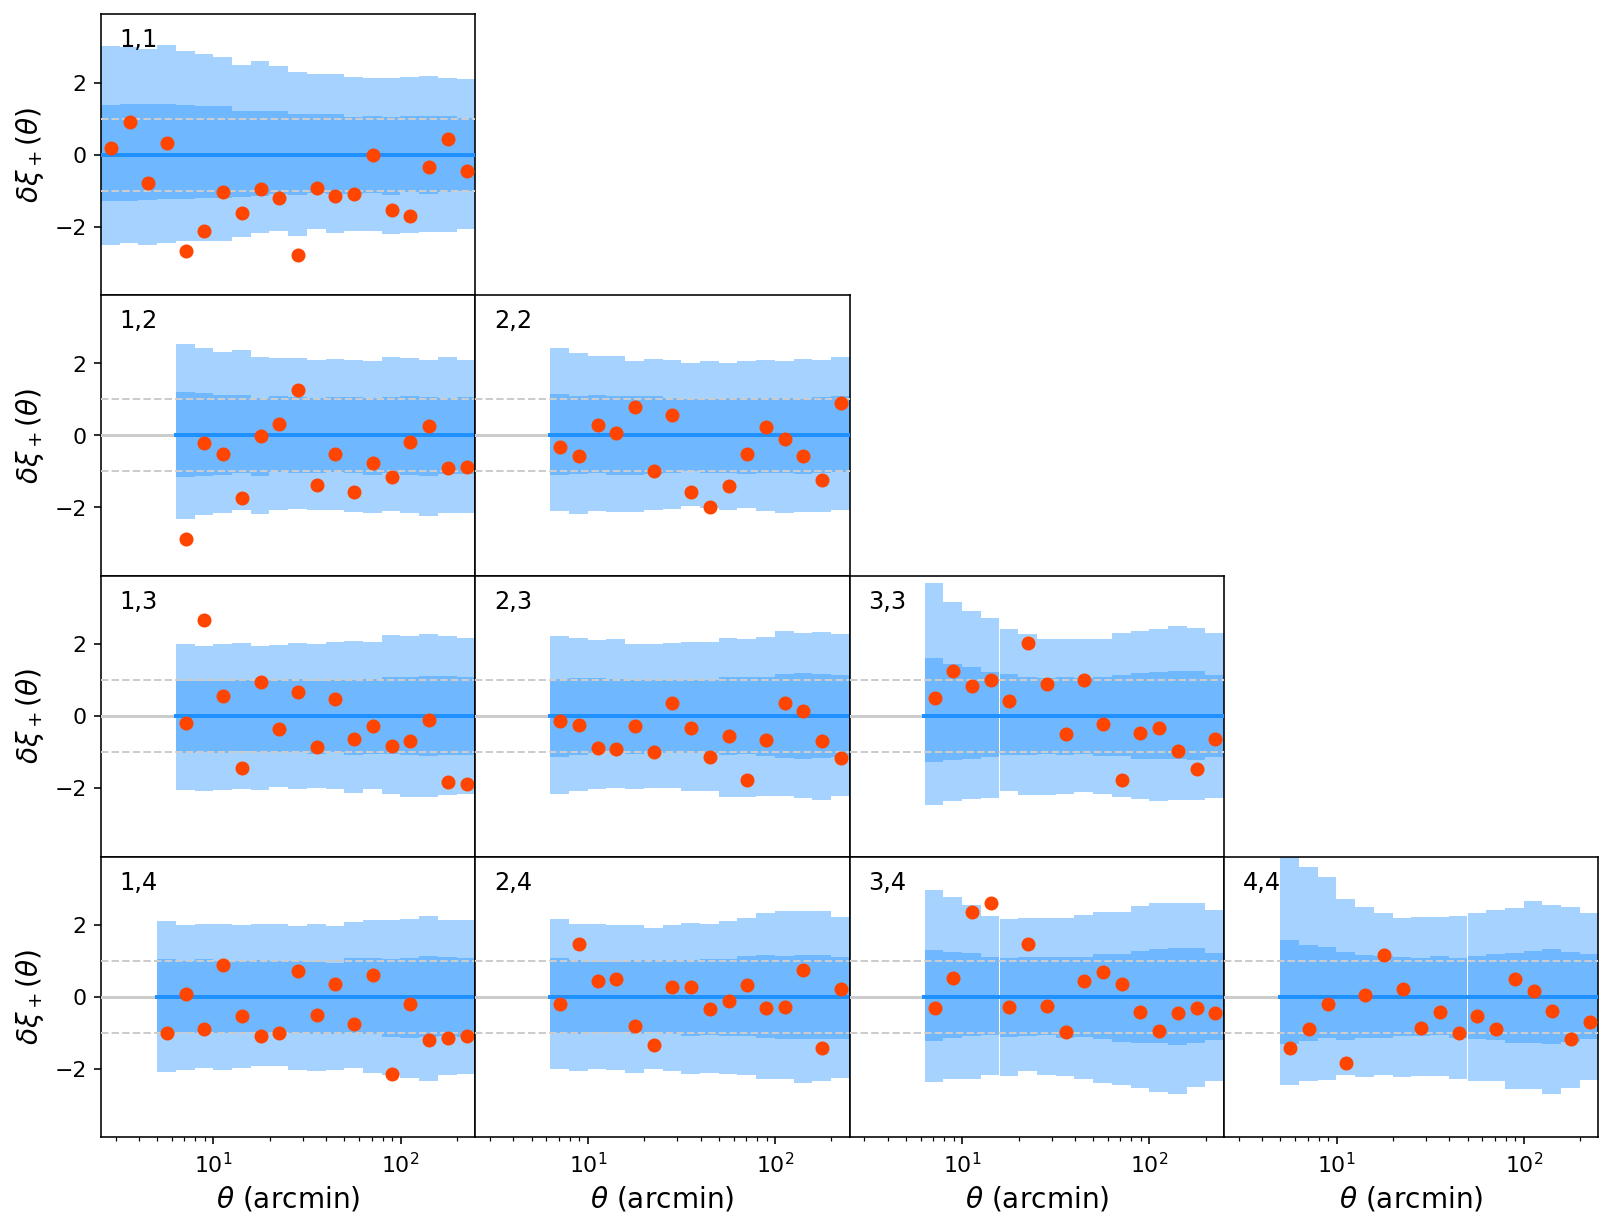

In [11]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal)

# 1x2bin1_vs_1x2nobin1

In [21]:
RUN_NAME = '1x2_nobin1_ML'
RUN_NAME_PPD = '1x2bin1_vs_1x2nobin1'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    like_module='2pt_dprime_like',
    data_sets=['xip', 'xim'],
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2_nobin1_ML.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'intrinsic_alignment_parameters--a1', 'intrinsic_alignment_parameters--a2', 'intrinsic_alignment_parameters--alpha1', 'intr


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2_nobin1_ML.txt
Loading list chain at
../1x2bin1_vs_1x2nobin1/ppd_chain_1x2_nobin1_ML_1x2bin1_vs_1x2nobin1.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found bin cut for xip 1 1
Found bin cut for xip 1 2
Found bin cut for xip 1 3
Found bin cut for xip 1 4
Found bin cut for xim 1 1
Found bin cut for xim 1 2
Found bin cut for xim 1 3
Found bin cut for xim 1 4
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1)

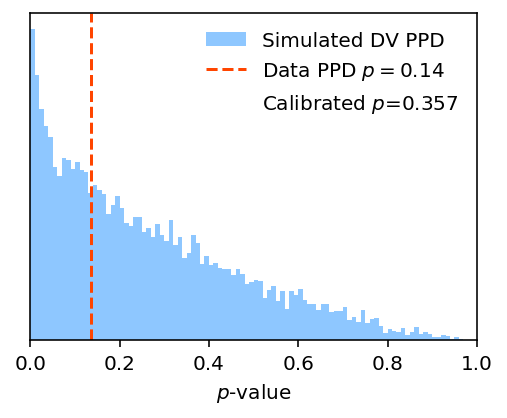

In [22]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim'],
    data_sets_dprime=['xip','xim'],
    N=10000,
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    sample_from='best-fit'
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2
## Observable p-value
-  xip p=0.075206


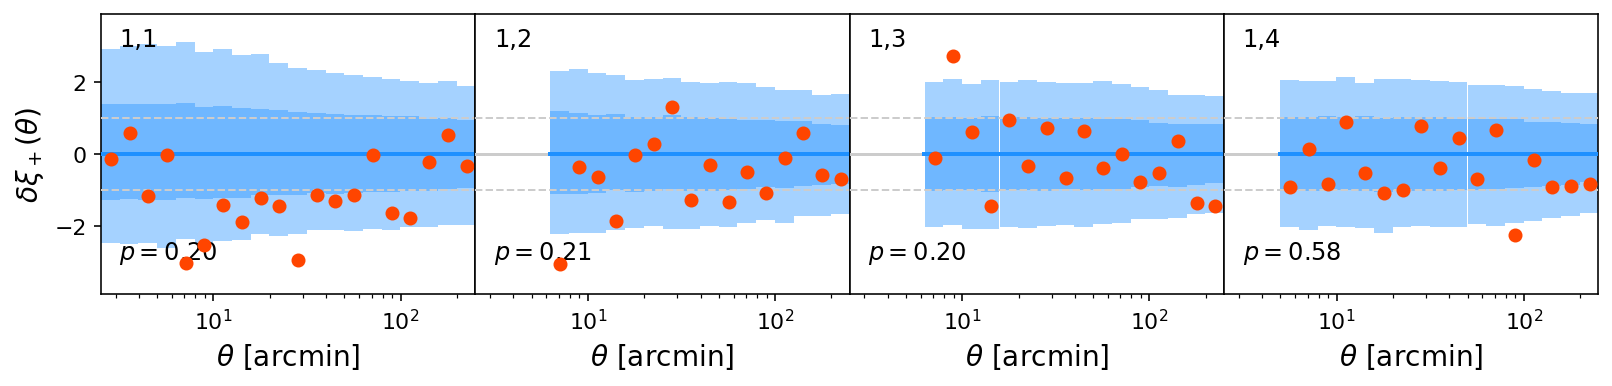

Using DV.fits covariance for chi2
## Observable p-value
-  xim p=0.607879


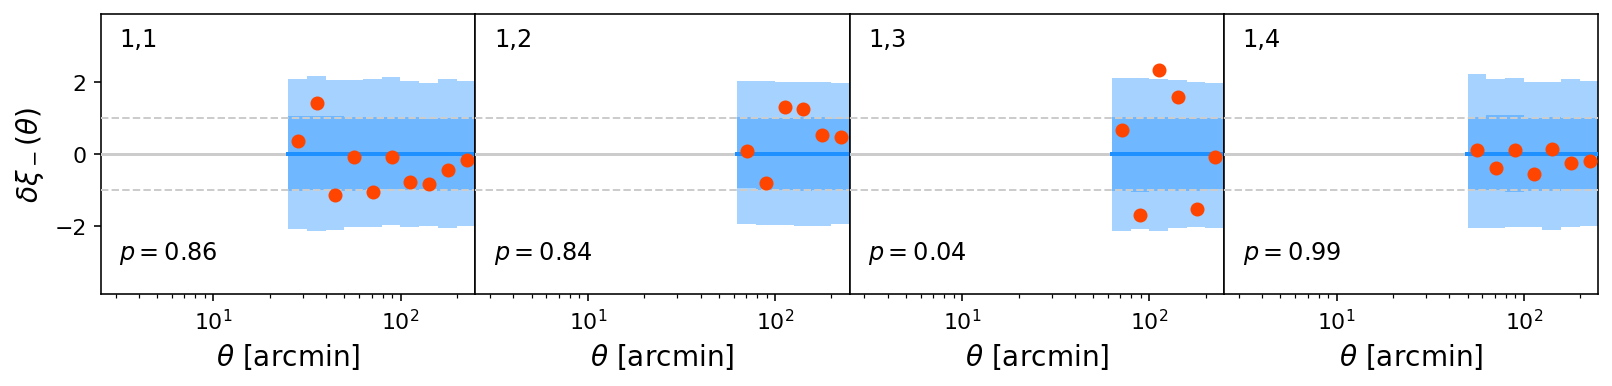

In [23]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 1, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 1, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal)

# 1x2bin2_vs_1x2nobin2

In [24]:
RUN_NAME = '1x2_nobin2_ML'
RUN_NAME_PPD = '1x2bin2_vs_1x2nobin2'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    like_module='2pt_dprime_like',
    data_sets=['xip', 'xim'],
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2_nobin2_ML.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'intrinsic_alignment_parameters--a1', 'intrinsic_alignment_parameters--a2', 'intrinsic_alignment_parameters--alpha1', 'intr


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2_nobin2_ML.txt
Loading list chain at
../1x2bin2_vs_1x2nobin2/ppd_chain_1x2_nobin2_ML_1x2bin2_vs_1x2nobin2.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found bin cut for xip 1 2
Found bin cut for xip 2 2
Found bin cut for xip 2 3
Found bin cut for xip 2 4
Found bin cut for xim 1 2
Found bin cut for xim 2 2
Found bin cut for xim 2 3
Found bin cut for xim 2 4
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1)

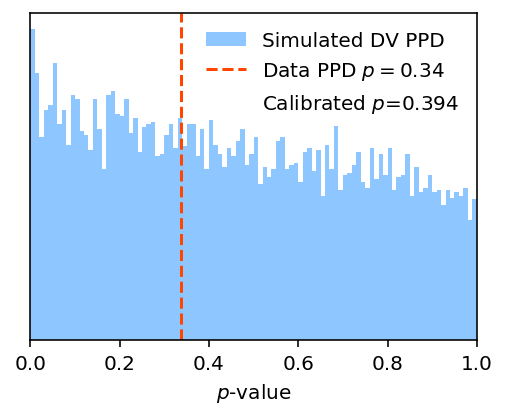

In [25]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim'],
    data_sets_dprime=['xip','xim'],
    N=10000,
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    sample_from='best-fit'
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2
## Observable p-value
-  xip p=0.501508


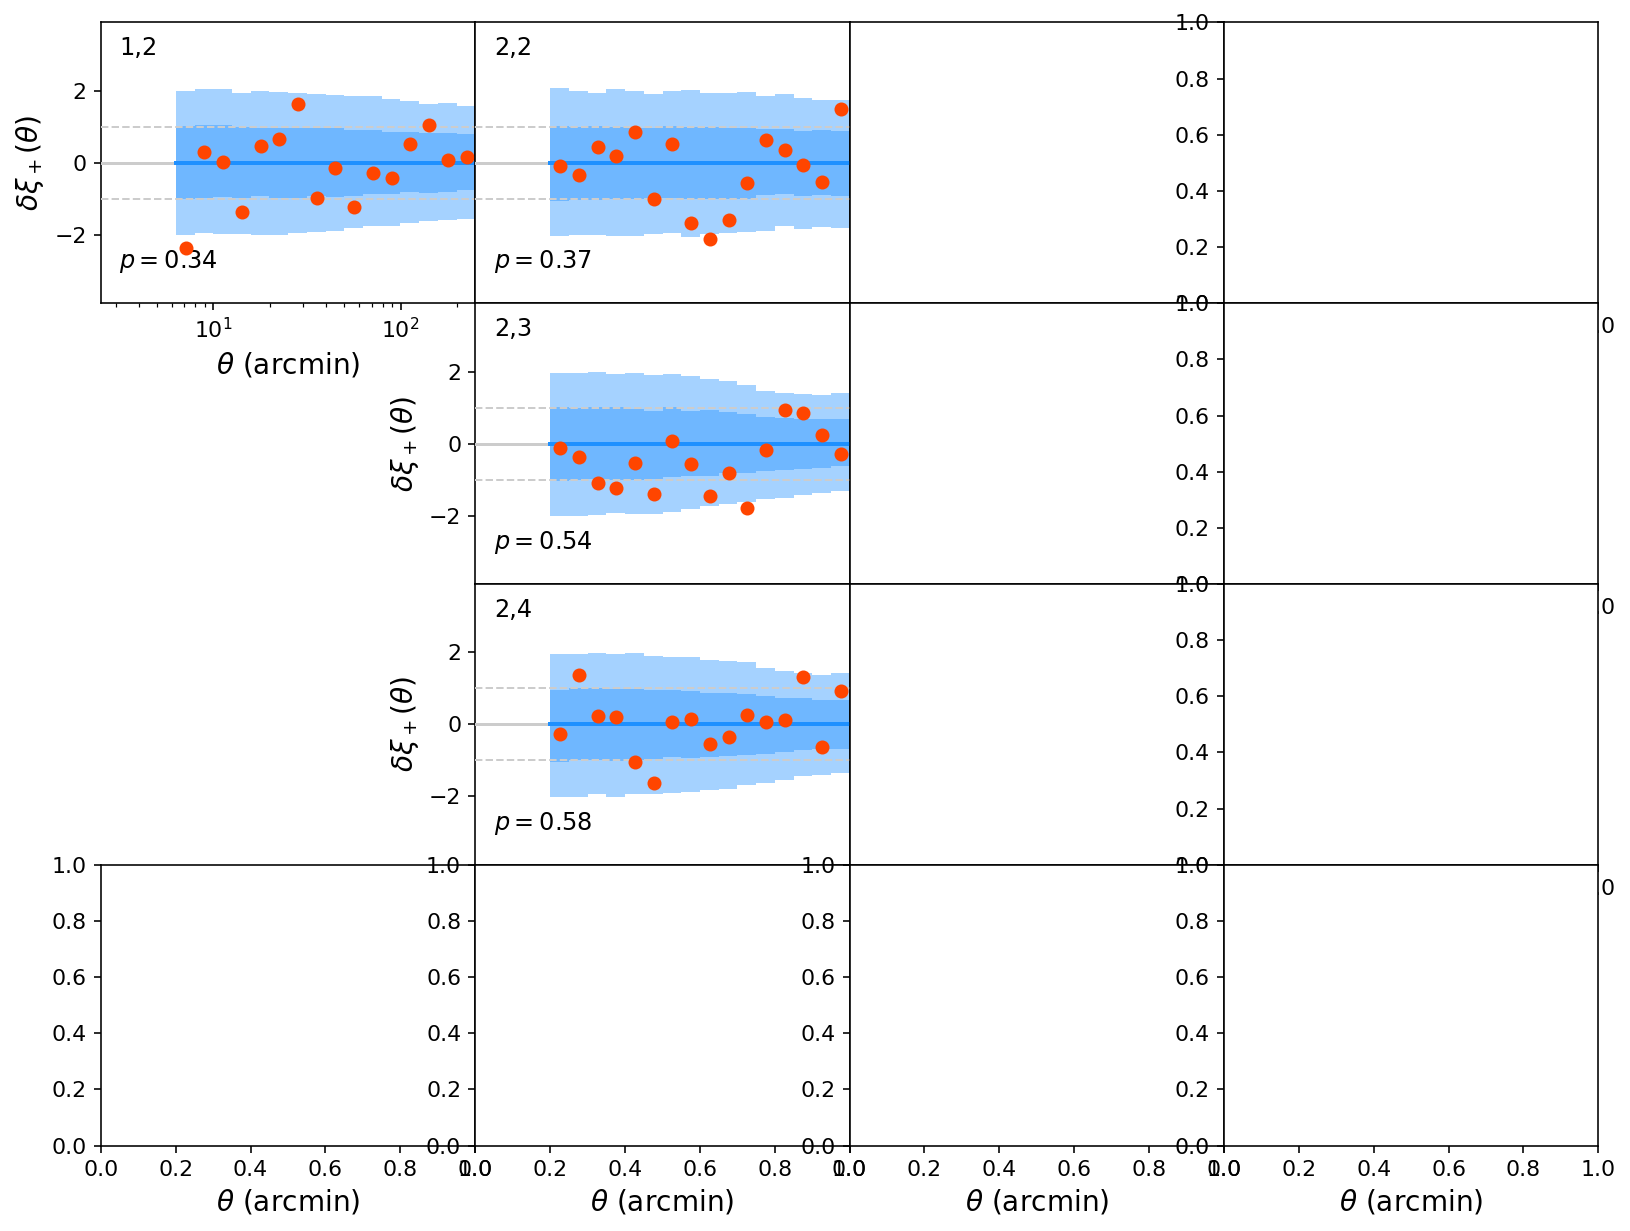

Using DV.fits covariance for chi2
## Observable p-value
-  xim p=0.115782


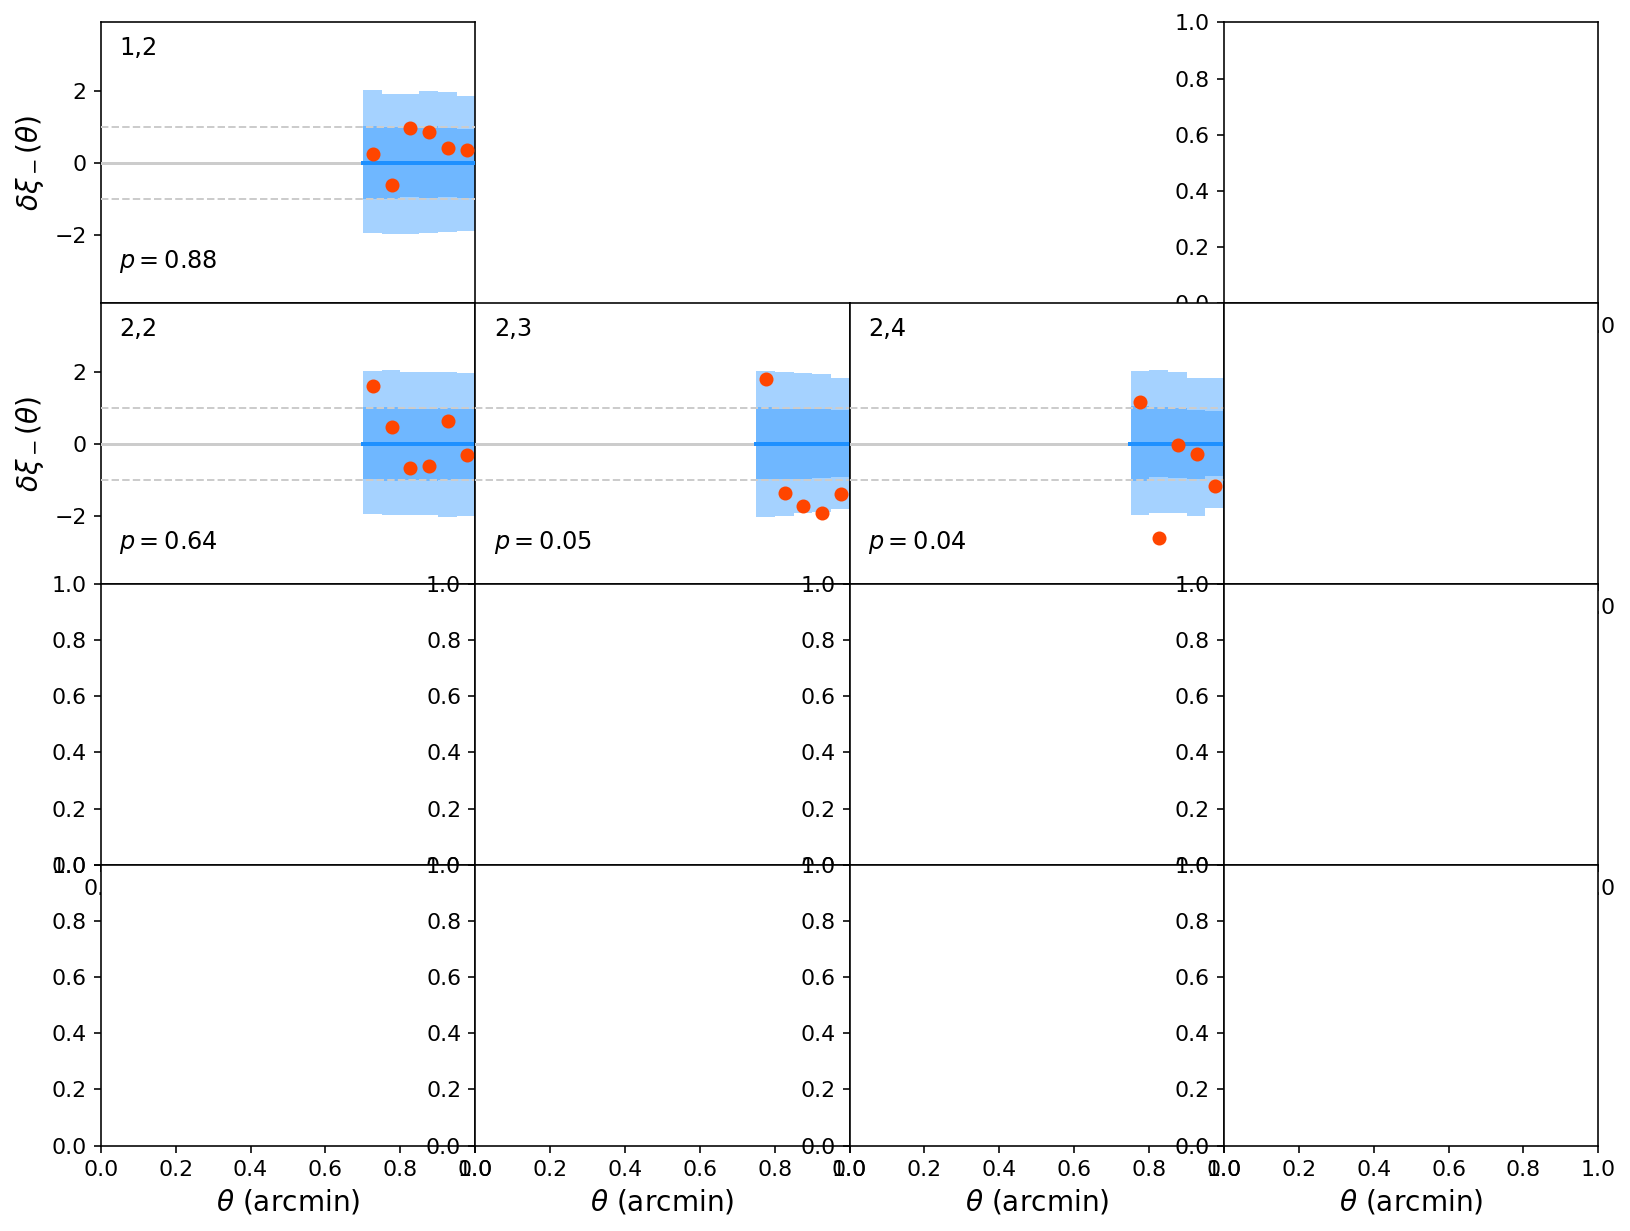

In [26]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal)

# 1x2bin3_vs_1x2nobin3

In [27]:
RUN_NAME = '1x2_nobin3_ML'
RUN_NAME_PPD = '1x2bin3_vs_1x2nobin3'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    like_module='2pt_dprime_like',
    data_sets=['xip', 'xim'],
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2_nobin3_ML.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'intrinsic_alignment_parameters--a1', 'intrinsic_alignment_parameters--a2', 'intrinsic_alignment_parameters--alpha1', 'intr


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2_nobin3_ML.txt
Loading list chain at
../1x2bin3_vs_1x2nobin3/ppd_chain_1x2_nobin3_ML_1x2bin3_vs_1x2nobin3.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found bin cut for xip 1 3
Found bin cut for xip 2 3
Found bin cut for xip 3 3
Found bin cut for xip 3 4
Found bin cut for xim 1 3
Found bin cut for xim 2 3
Found bin cut for xim 3 3
Found bin cut for xim 3 4
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1)

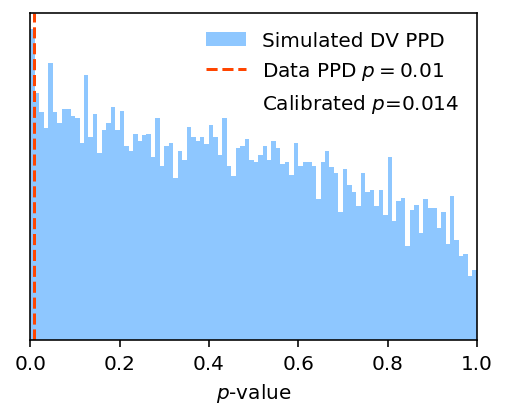

In [28]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim'],
    data_sets_dprime=['xip','xim'],
    N=10000,
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    sample_from='best-fit'
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2
## Observable p-value
-  xip p=0.027366


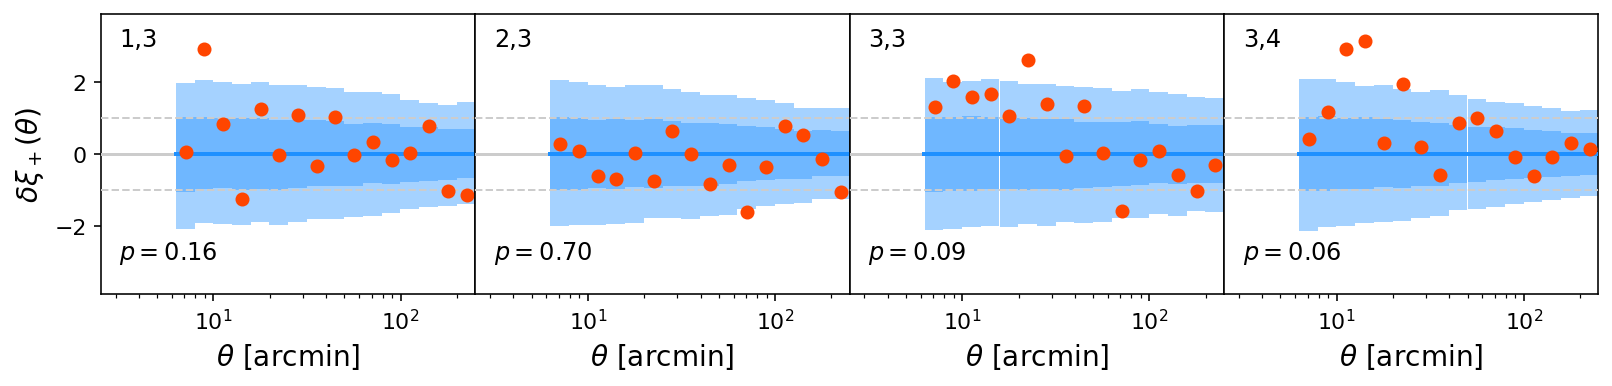

Using DV.fits covariance for chi2
## Observable p-value
-  xim p=0.056196


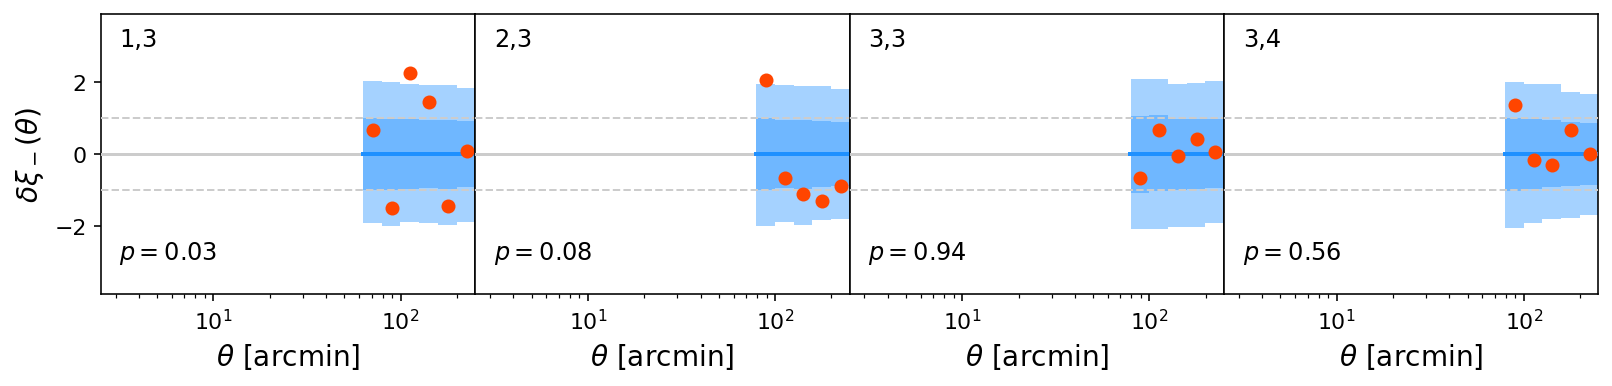

In [29]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 1, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 1, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal)

# 1x2bin4_vs_1x2nobin4

In [30]:
RUN_NAME = '1x2_nobin4_ML'
RUN_NAME_PPD = '1x2bin4_vs_1x2nobin4'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    like_module='2pt_dprime_like',
    data_sets=['xip', 'xim'],
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2_nobin4_ML.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'intrinsic_alignment_parameters--a1', 'intrinsic_alignment_parameters--a2', 'intrinsic_alignment_parameters--alpha1', 'intr


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2_nobin4_ML.txt
Loading list chain at
../1x2bin4_vs_1x2nobin4/ppd_chain_1x2_nobin4_ML_1x2bin4_vs_1x2nobin4.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found bin cut for xip 1 4
Found bin cut for xip 2 4
Found bin cut for xip 3 4
Found bin cut for xip 4 4
Found bin cut for xim 1 4
Found bin cut for xim 2 4
Found bin cut for xim 3 4
Found bin cut for xim 4 4
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1)

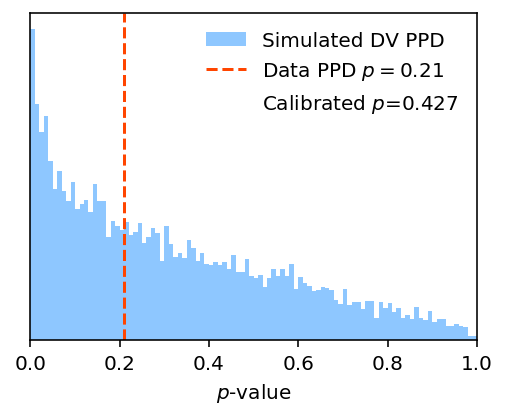

In [31]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim'],
    data_sets_dprime=['xip','xim'],
    N=10000,
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    sample_from='best-fit'
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2
## Observable p-value
-  xip p=0.208347


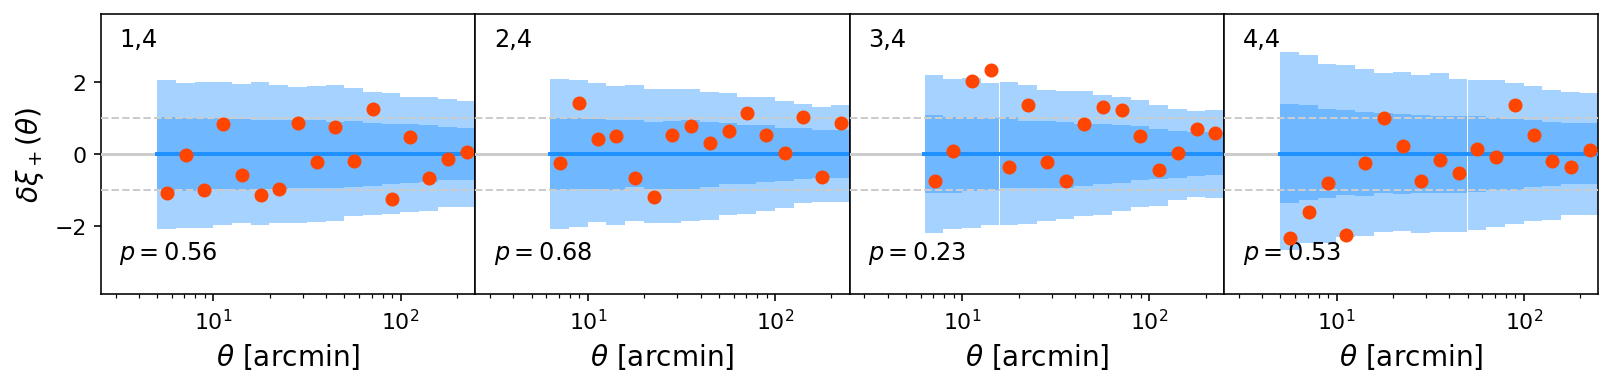

Using DV.fits covariance for chi2
## Observable p-value
-  xim p=0.500618


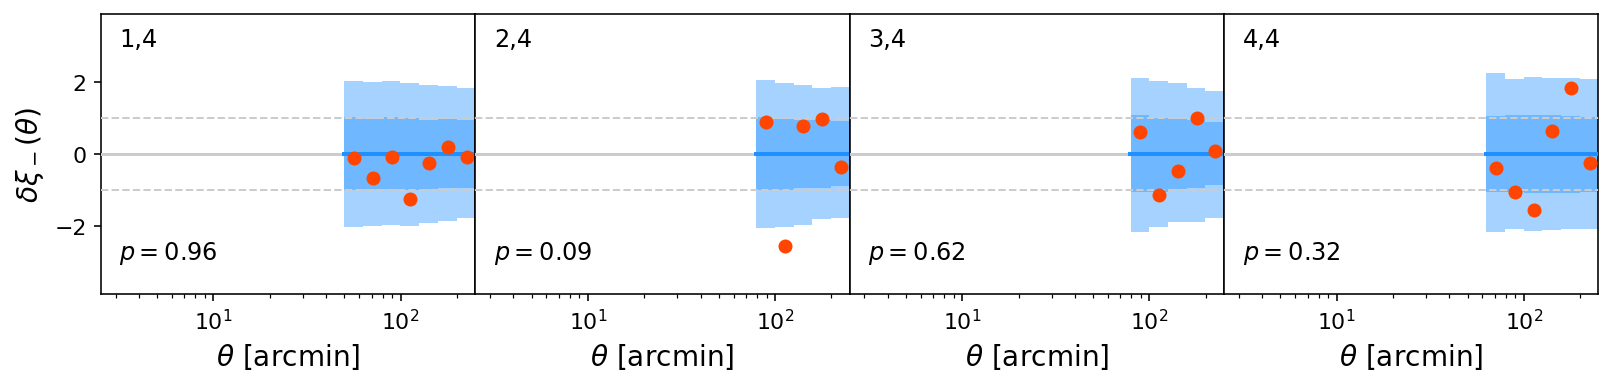

In [32]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 1, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 1, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal)

# 1x2bin12_vs_1x2nobin12

In [13]:
RUN_NAME = '1x2nobin12_ML'
RUN_NAME_PPD = '1x2bin12_vs_1x2nobin12'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    like_module='2pt_dprime_like',
    data_sets=['xip', 'xim'],
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2nobin12_ML.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'intrinsic_alignment_parameters--a1', 'intrinsic_alignment_parameters--a2', 'intrinsic_alignment_parameters--alpha1', 'intr


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2nobin12_ML.txt
Loading list chain at
../1x2bin12_vs_1x2nobin12/ppd_chain_1x2nobin12_ML_1x2bin12_vs_1x2nobin12.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found bin cut for xip 1 1
Found bin cut for xip 1 2
Found bin cut for xip 1 3
Found bin cut for xip 1 4
Found bin cut for xip 2 2
Found bin cut for xip 2 3
Found bin cut for xip 2 4
Found bin cut for xim 1 1
Found bin cut for xim 1 2
Found bin cut for xim 1 3
Found bin cut for xim 1 4
Found bin cut for xim 2 2
Found bin cut for xim 2 3
Found bin cut for xim 2 4
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2

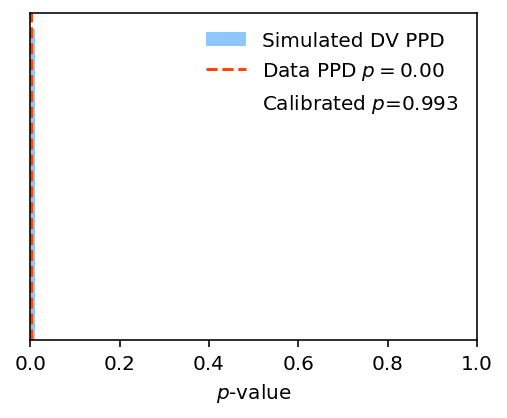

In [14]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim'],
    data_sets_dprime=['xip','xim'],
    N=10000,
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    sample_from='best-fit'
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2
## Observable p-value
-  xip p=0.000480


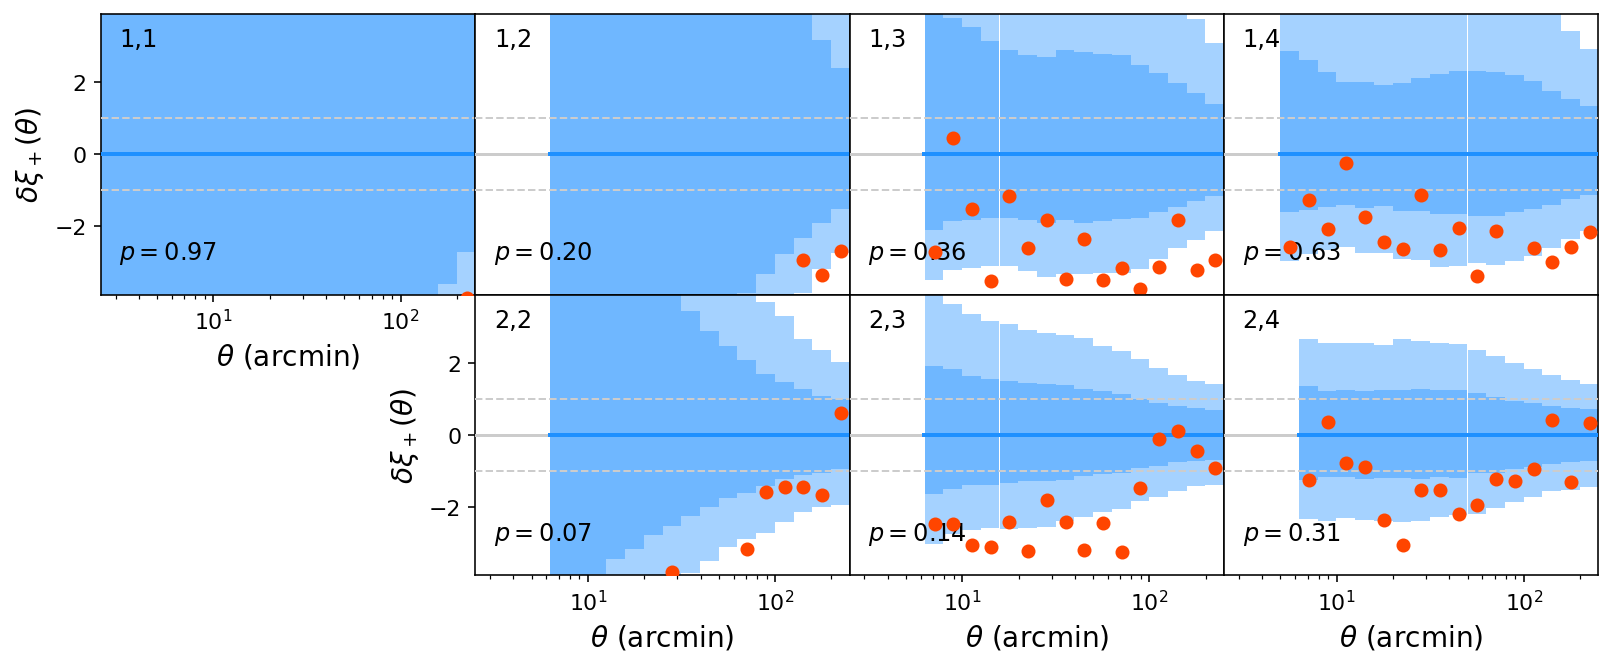

Using DV.fits covariance for chi2
## Observable p-value
-  xim p=0.006068


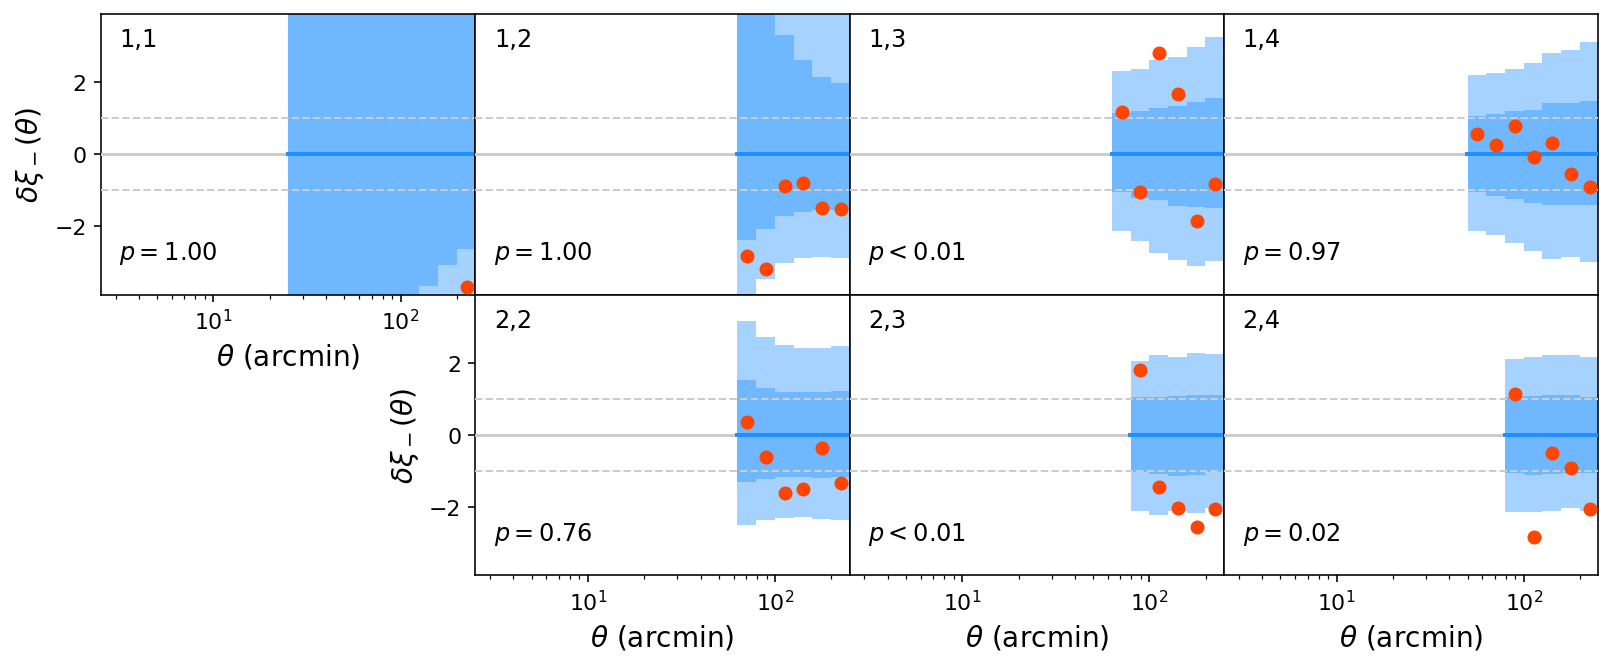

In [15]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 2, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 2, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal)

Using DV.fits covariance for chi2
## Observable p-value
-  xip p=0.000480


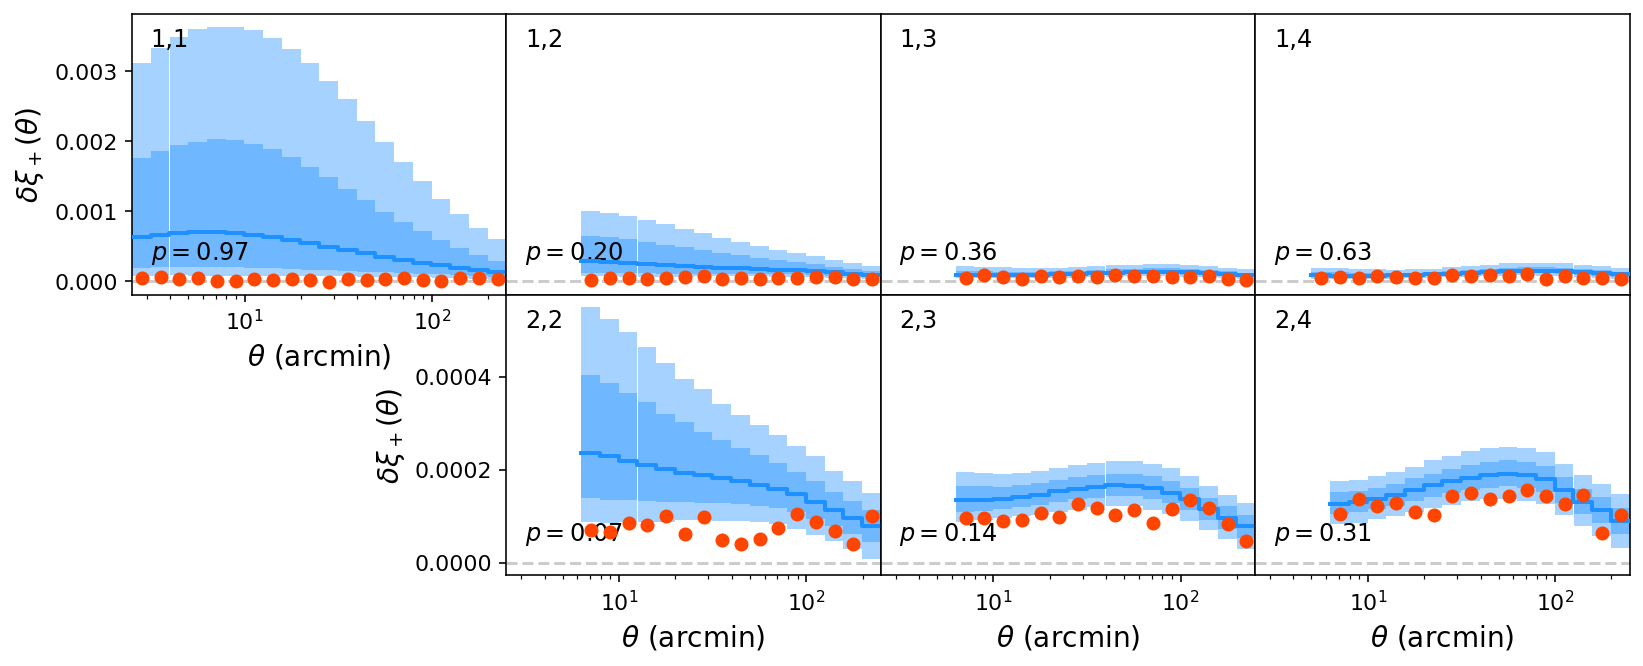

Using DV.fits covariance for chi2
## Observable p-value
-  xim p=0.006068


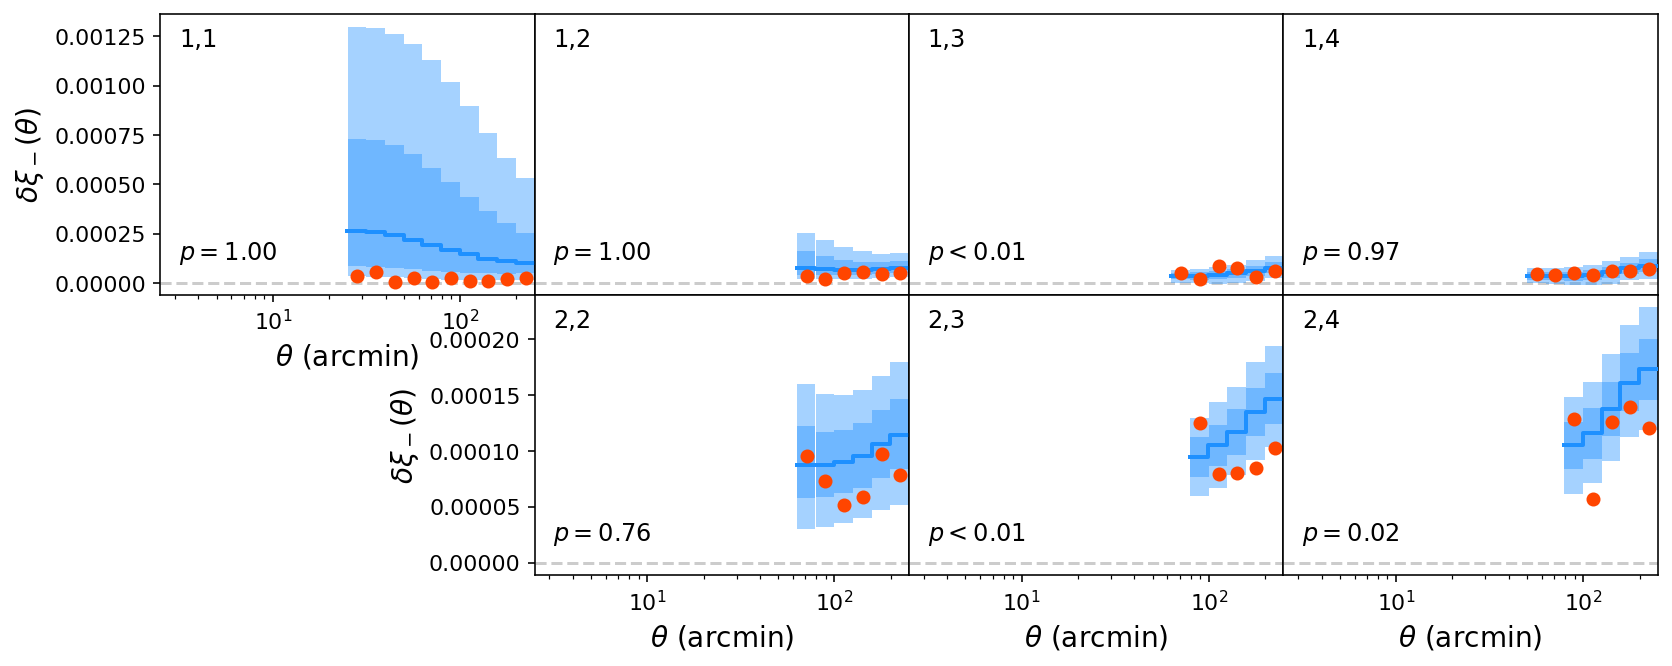

In [16]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 2, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=False, theta_factor=1)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 2, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=False, theta_factor=1)

# 1x2bin34_vs_1x2nobin34

In [17]:
RUN_NAME = '1x2nobin34_ML'
RUN_NAME_PPD = '1x2bin34_vs_1x2nobin34'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    like_module='2pt_dprime_like',
    data_sets=['xip', 'xim'],
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2nobin34_ML.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'intrinsic_alignment_parameters--a1', 'intrinsic_alignment_parameters--a2', 'intrinsic_alignment_parameters--alpha1', 'intr


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_1x2nobin34_ML.txt
Loading list chain at
../1x2bin34_vs_1x2nobin34/ppd_chain_1x2nobin34_ML_1x2bin34_vs_1x2nobin34.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found bin cut for xip 1 3
Found bin cut for xip 1 4
Found bin cut for xip 2 3
Found bin cut for xip 2 4
Found bin cut for xip 3 3
Found bin cut for xip 3 4
Found bin cut for xip 4 4
Found bin cut for xim 1 3
Found bin cut for xim 1 4
Found bin cut for xim 2 3
Found bin cut for xim 2 4
Found bin cut for xim 3 3
Found bin cut for xim 3 4
Found bin cut for xim 4 4
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2

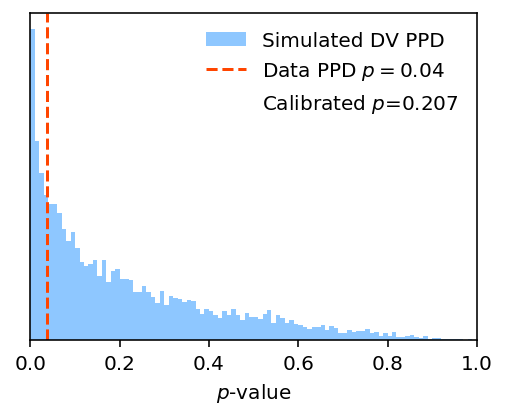

In [18]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip','xim'],
    data_sets_dprime=['xip','xim'],
    N=10000,
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    sample_from='best-fit'
)[-1]

print(('{} & '*6 + r'{} \\').format(*[round(pcal[subset], 3) if subset in pcal.keys() else '--' for subset in main_subsets]))

Using DV.fits covariance for chi2
## Observable p-value
-  xip p=0.084587


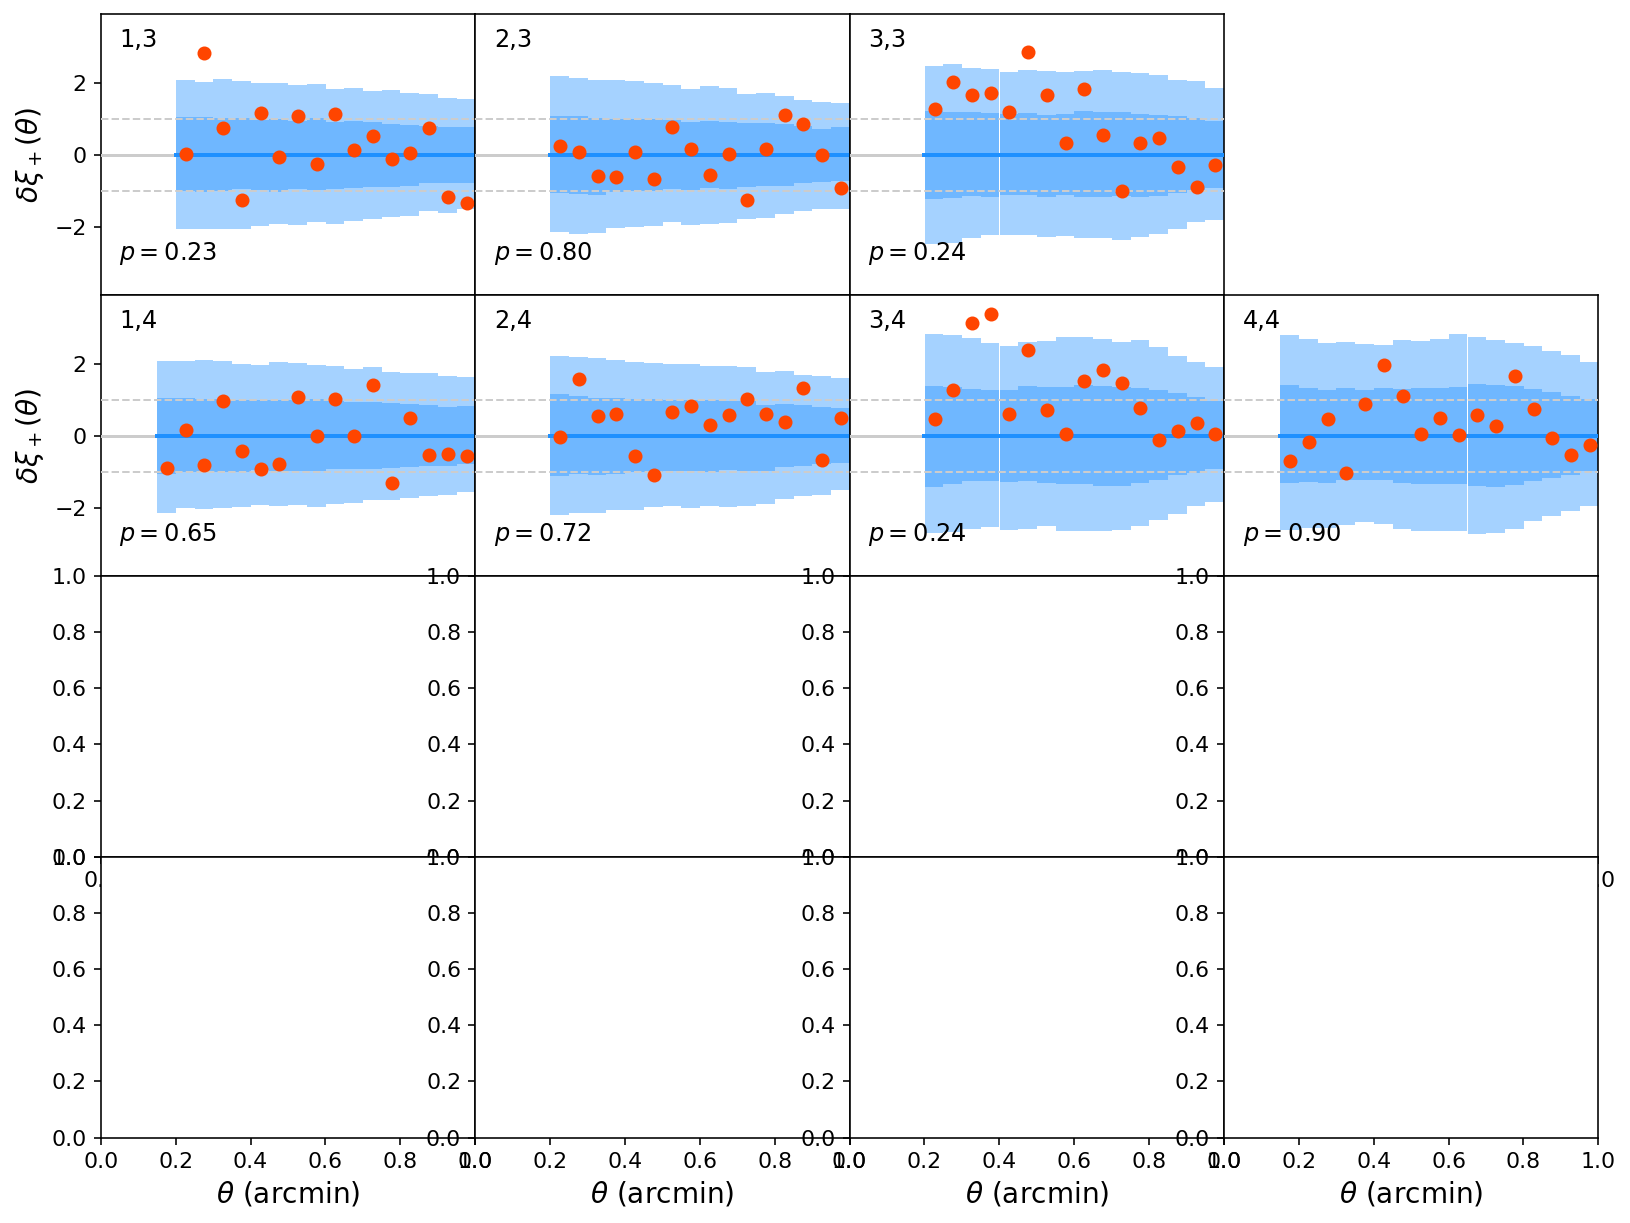

Using DV.fits covariance for chi2
## Observable p-value
-  xim p=0.090933


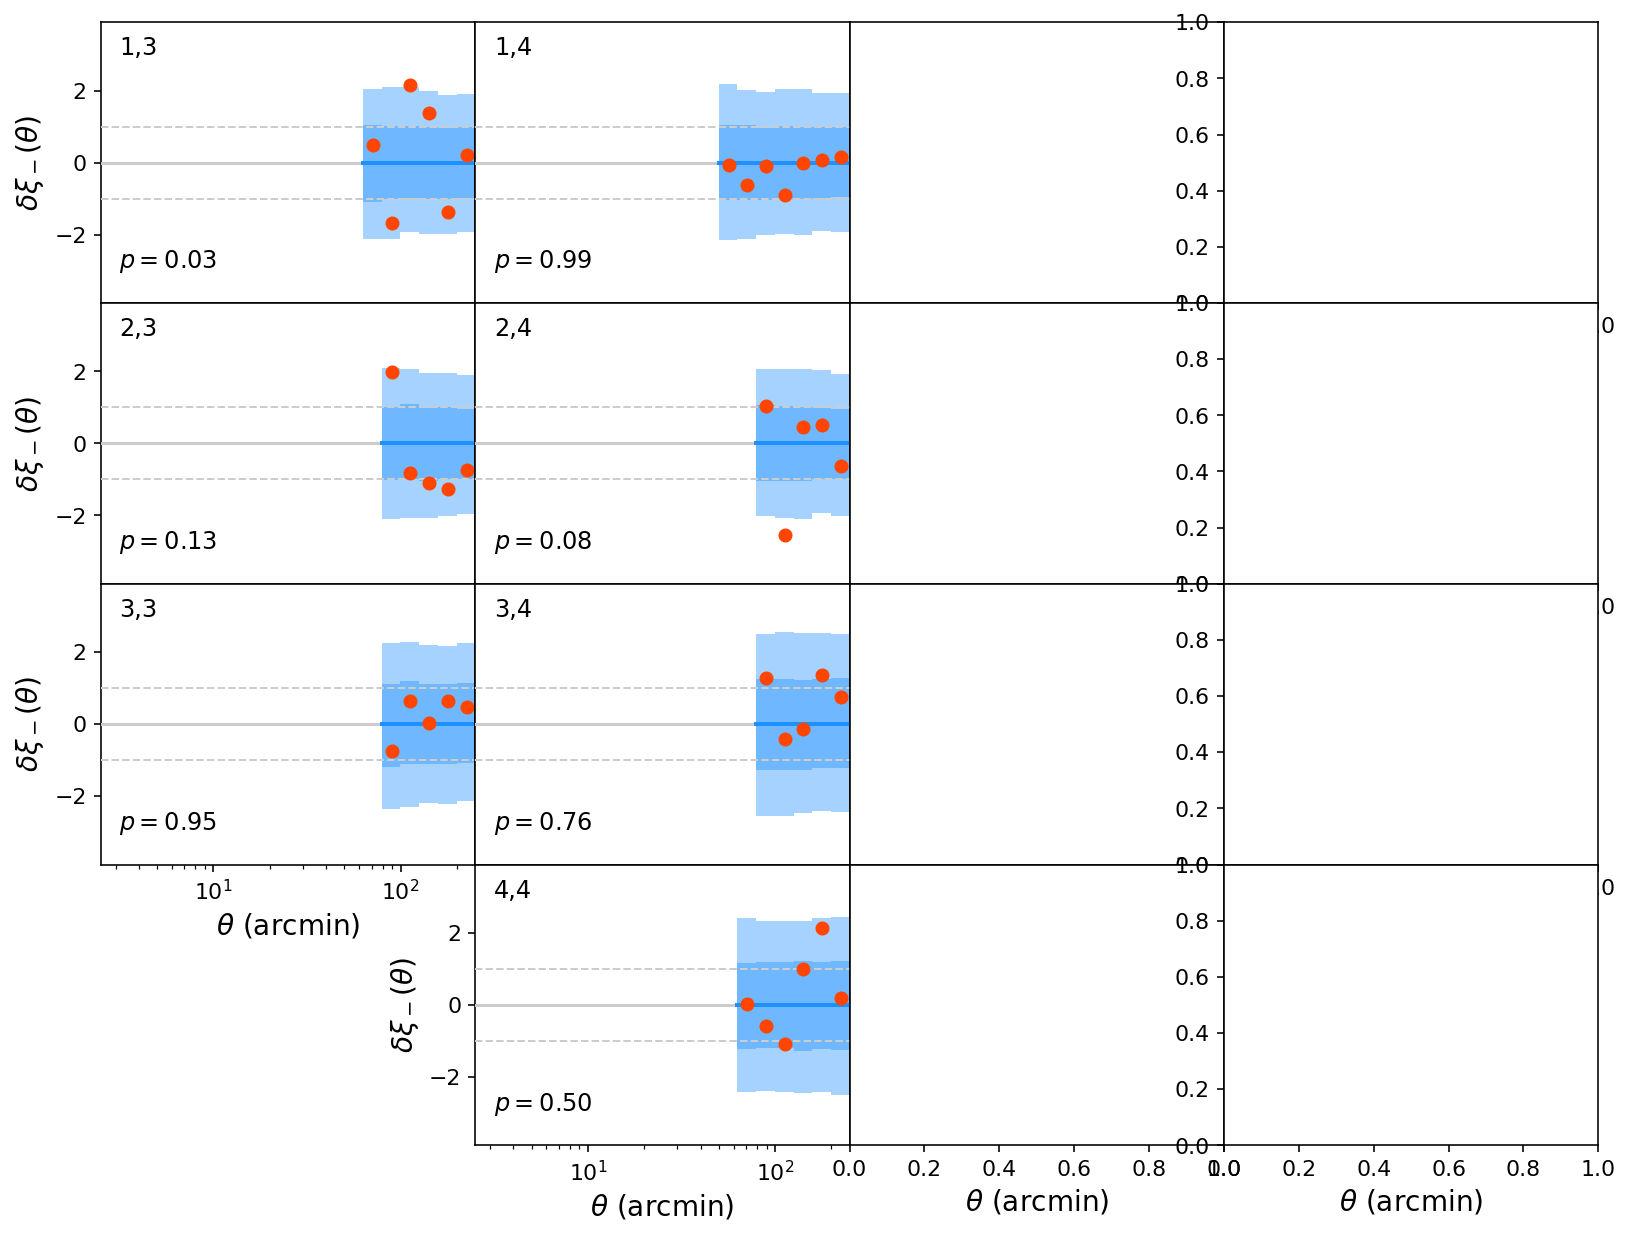

In [19]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal)

Using DV.fits covariance for chi2
## Observable p-value
-  xip p=0.084587


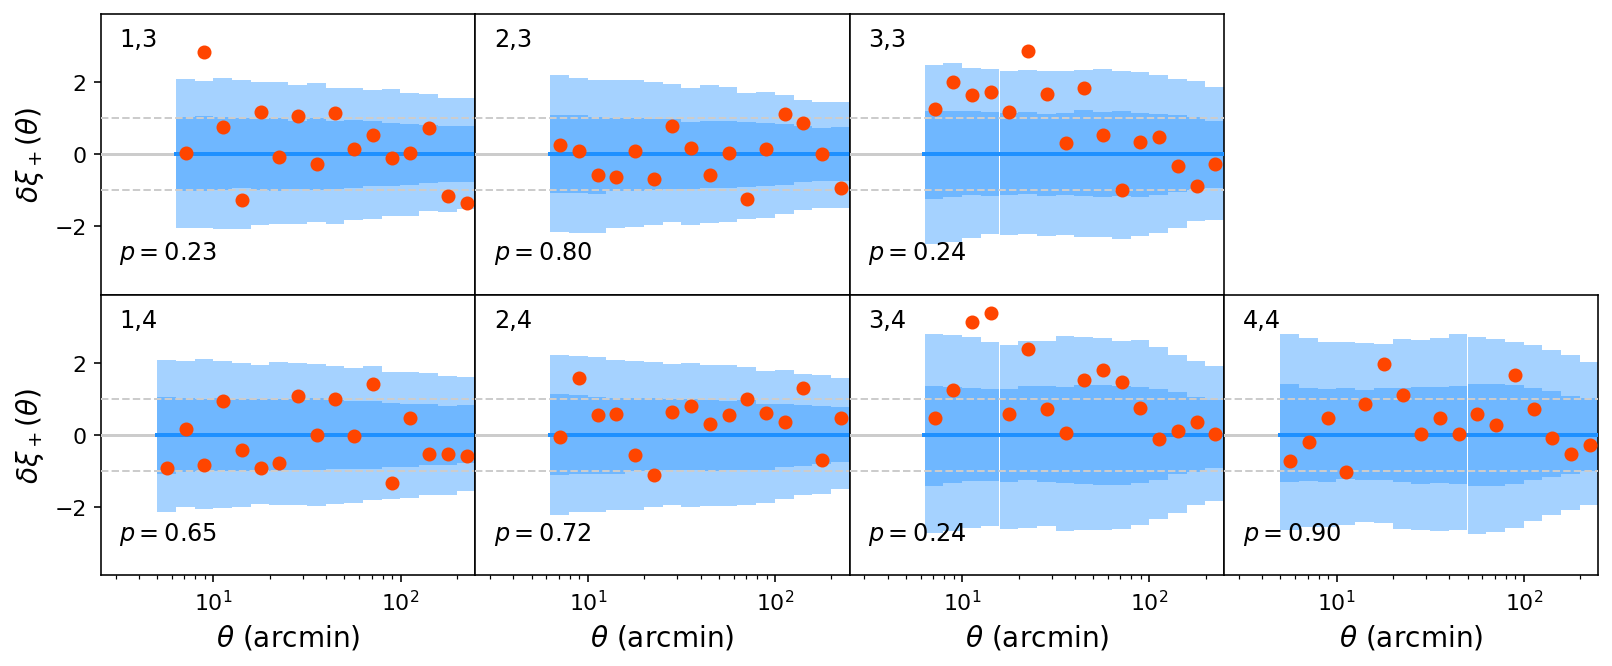

Using DV.fits covariance for chi2


IndexError: index 2 is out of bounds for axis 0 with size 2

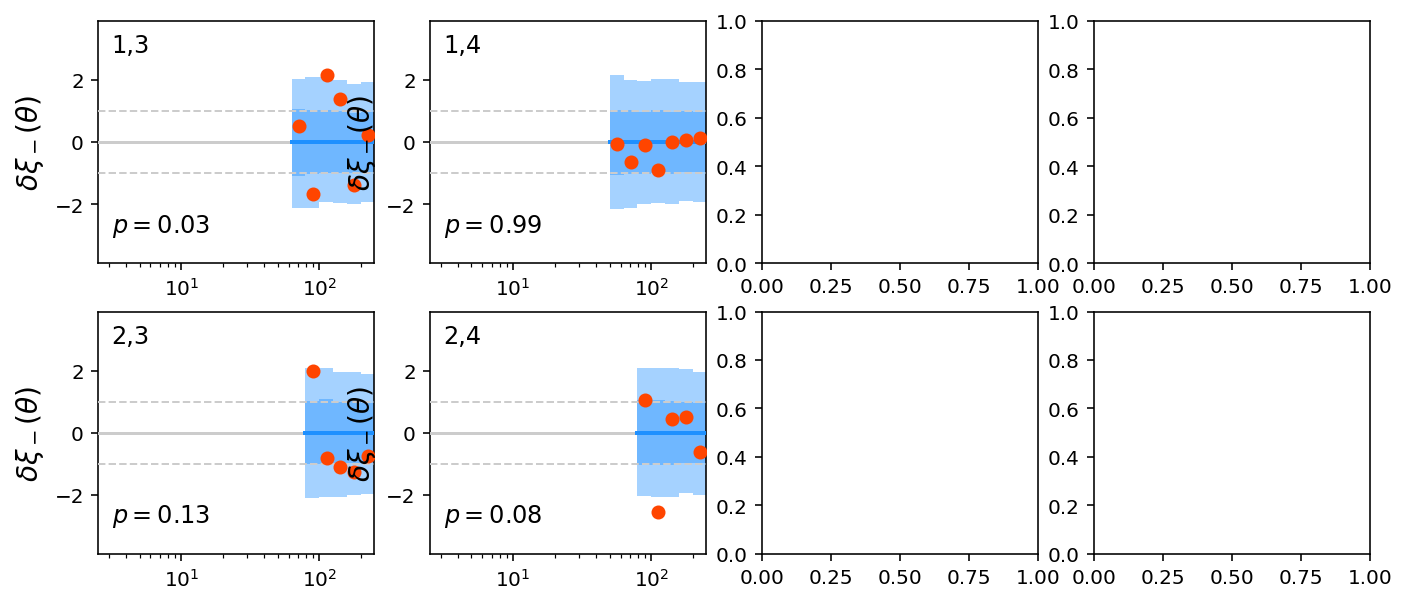

In [20]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 2, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal)

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 2, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal)

# xip goodness of fit

In [12]:
RUN_NAME = 'xiponly_ML'
RUN_NAME_PPD = 'xip_goodnessoffit'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['xip']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_xiponly_ML.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'intrinsic_alignment_parameters--a1', 'intrinsic_alignment_parameters--a2', 'intrinsic_alignment_parameters--alpha1', 'intrins


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_xiponly_ML.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)], 'wtheta': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 3), (3, 4), (3, 5), (3, 6), (4, 4), (4, 5), (4, 6), (5, 5), (5, 6), (6, 6)]}
Getting indices for xip

Found obse

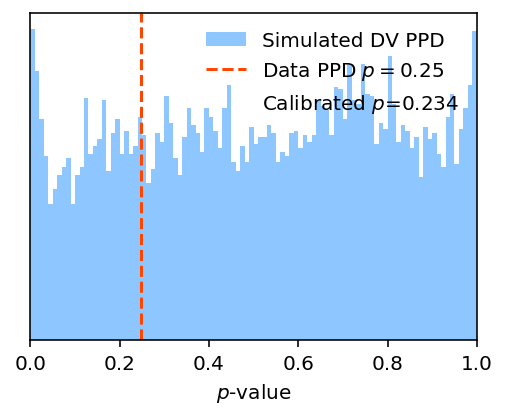

In [13]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xip'],
    data_sets_dprime=['xip'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    #use_logit=(1e-6,1),
    sample_from='best-fit'  # Trying this (different from y1 notebook)
)[-1]

Using DV.fits covariance for chi2


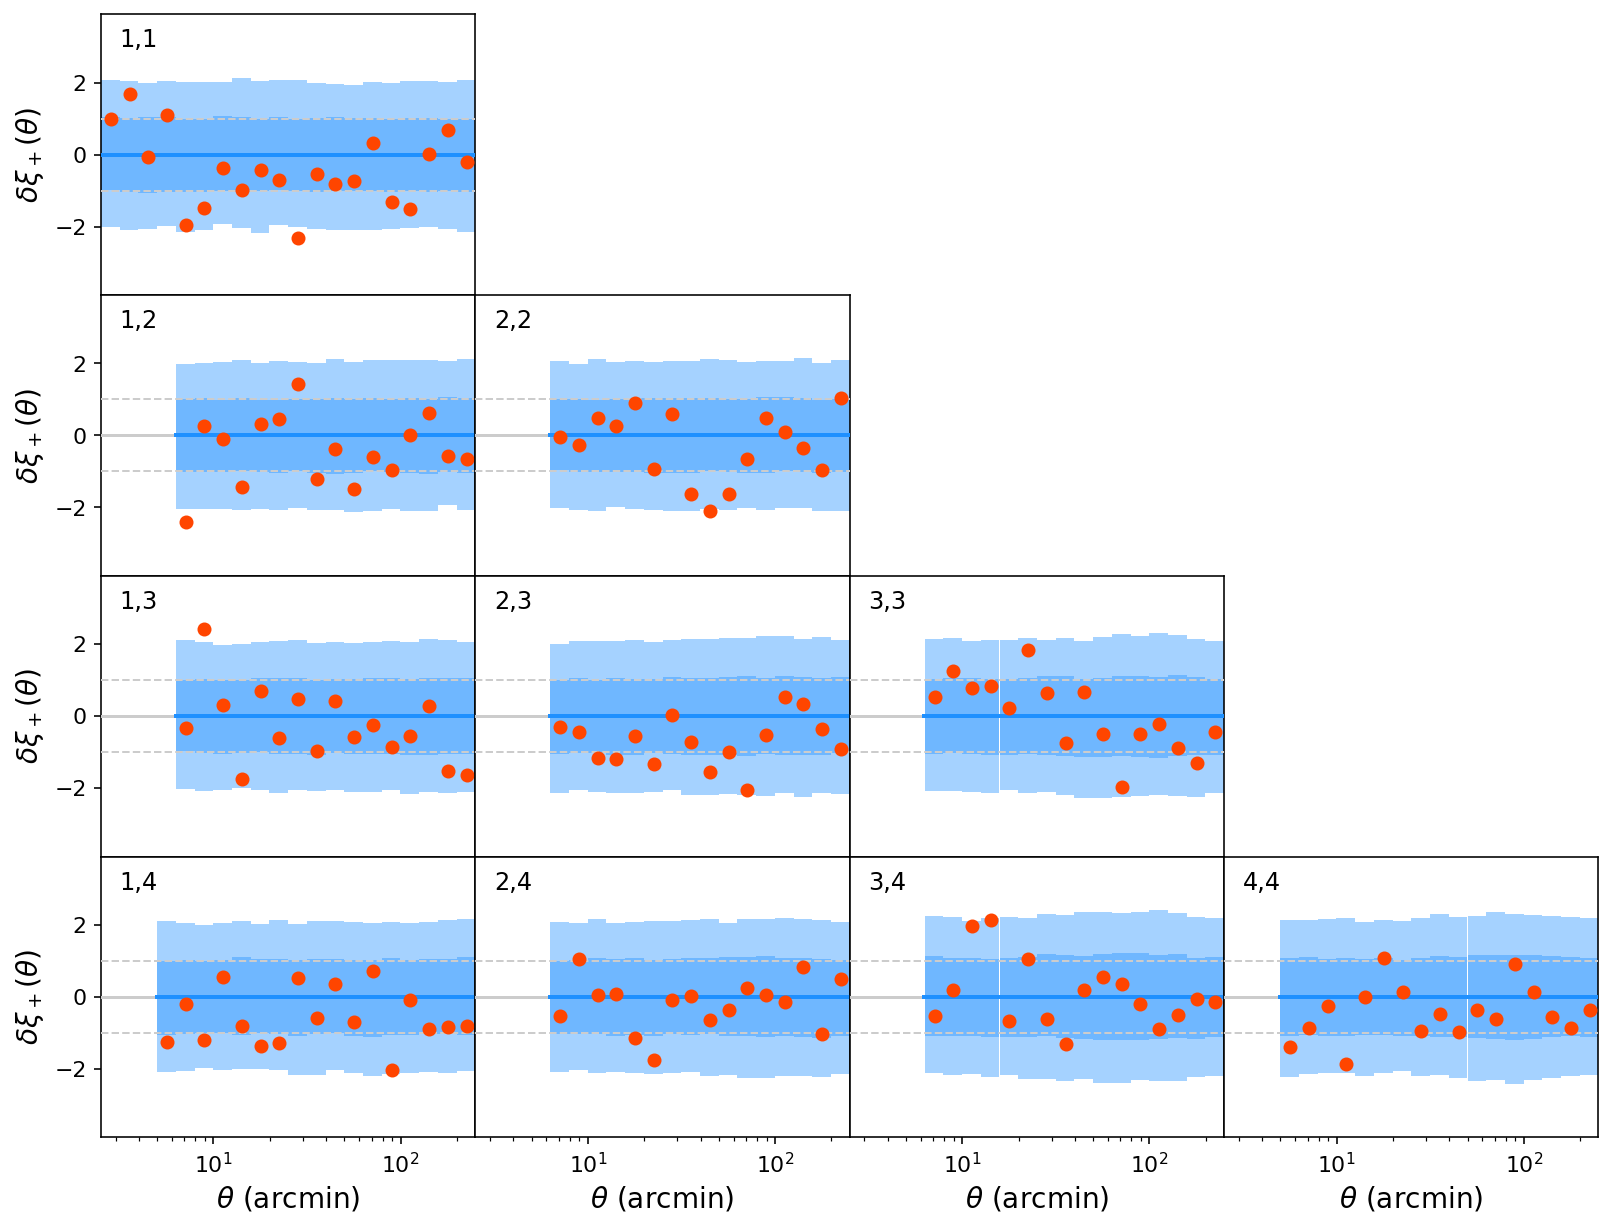

In [14]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


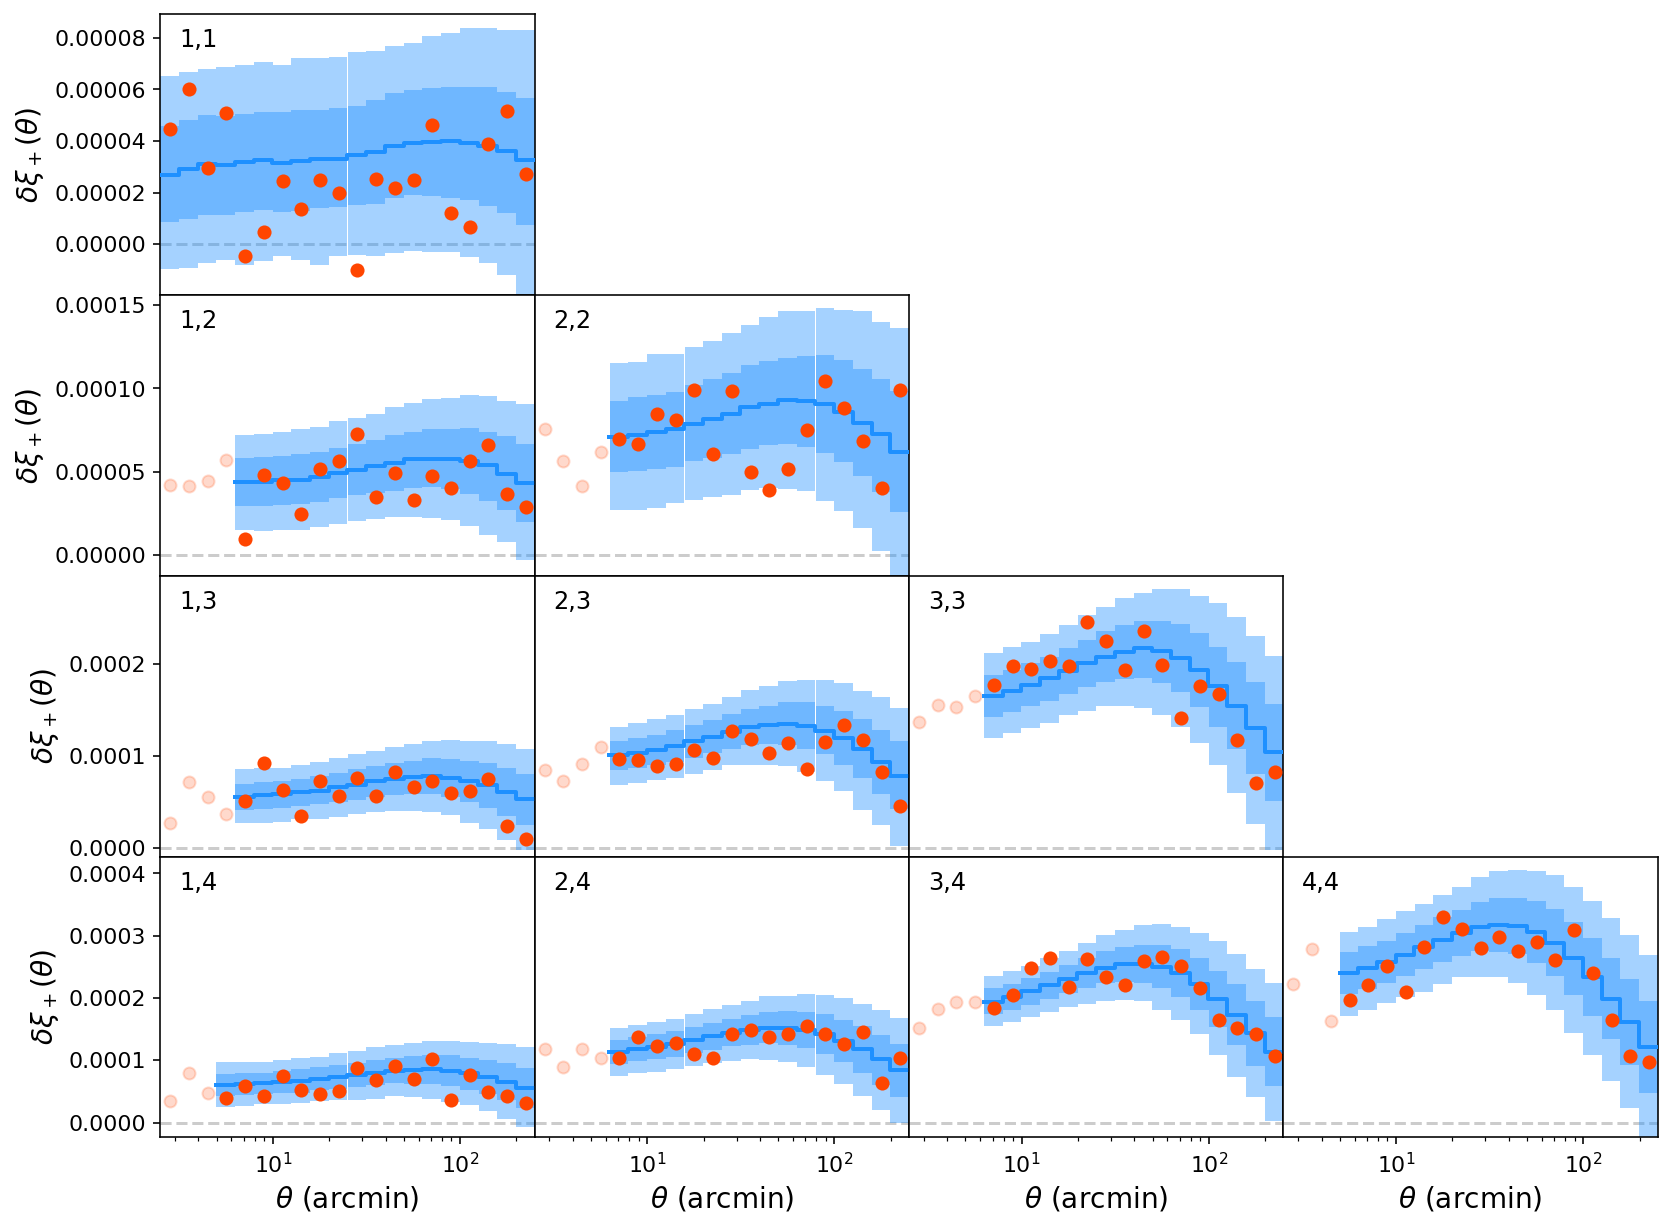

In [15]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xip', 4, 4, '$\\delta \\xi_+(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=True, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)

# xim goodness of fit

In [16]:
RUN_NAME = 'ximonly_ML'
RUN_NAME_PPD = 'xim_goodnessoffit'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    data_sets=['xim']
)


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_ximonly_ML.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_errors--width_3', 'bias_lens--b1', 'bias_lens--b2', 'bias_lens--b3', 'intrinsic_alignment_parameters--a1', 'intrinsic_alignment_parameters--a2', 'intrinsic_alignment_parameters--alpha1', 'intrins


###############################
## Loading chains #############
###############################
Loading Polychord chain at
../../trimmed_chains/chain_ximonly_ML.txt

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_d_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)], 'wtheta': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 3), (3, 4), (3, 5), (3, 6), (4, 4), (4, 5), (4, 6), (5, 5), (5, 6), (6, 6)]}
Getting indices for xim

Found obse

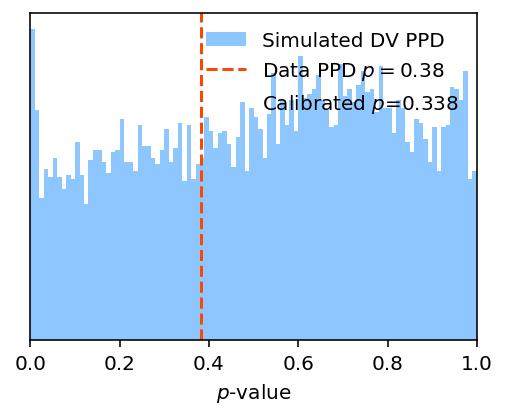

In [17]:
pcal = calib.calibrate_pvals(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    fiducial_dv=fiducial_dv,
    data_sets_d=['xim'],
    data_sets_dprime=['xim'],
    N=10000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
    title=RUN_NAME_PPD,
    pval_data=res[0]['full'],
    use_pm=True,
    clip_is=0.1,
    ndraws=1,
    pvals_subsets=res[0],
    #use_logit=(1e-6,1),
    sample_from='best-fit'  # Trying this (different from y1 notebook)
)[-1]

Using DV.fits covariance for chi2


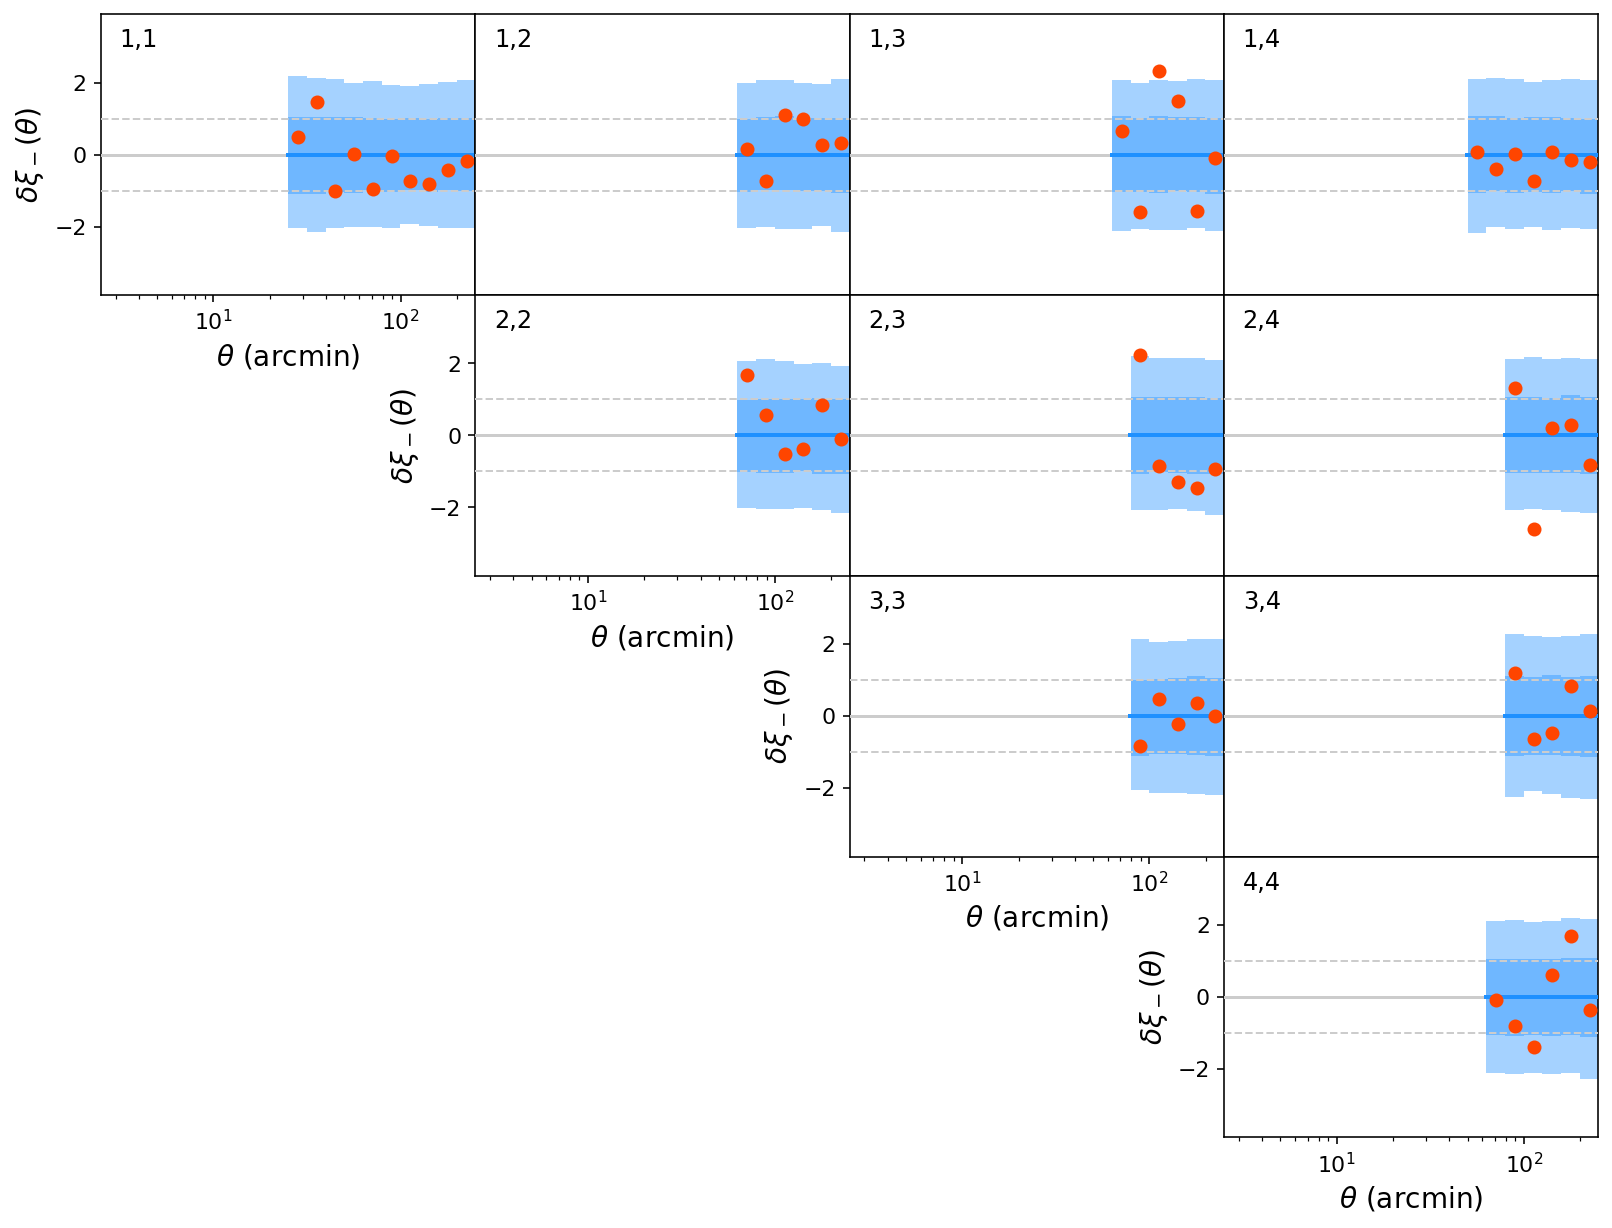

In [18]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=True, pcal=pcal, scale_bestfit=True, get_chi2=False)

Using DV.fits covariance for chi2


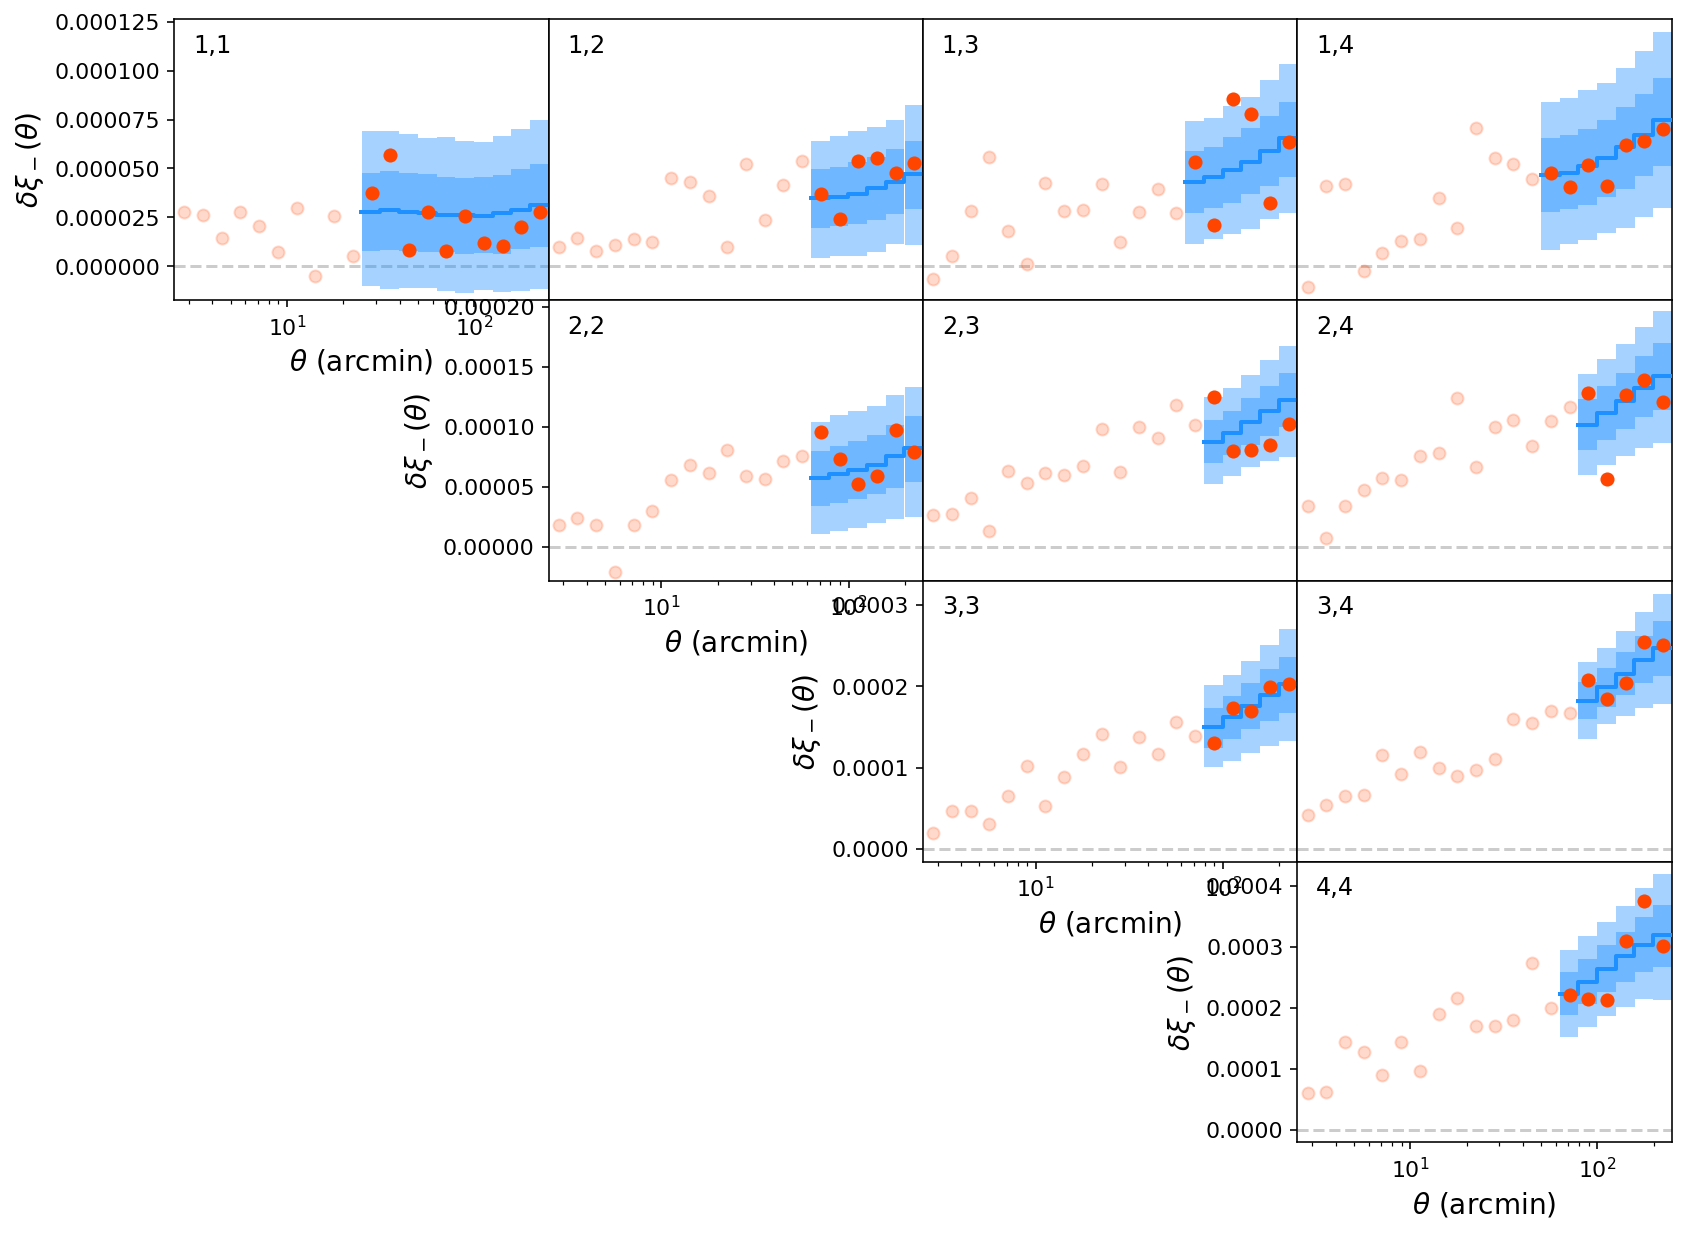

In [19]:
pval, dico_indices, ppd_data_obs, ppd_realizations, ppd_theory, weights, ppd_chain, ppd_output_file_basename = res

fig, axes, extra = ppd_plots.ppd_plot_all_obs('xim', 4, 4, '$\\delta \\xi_-(\\theta)$', RUN_NAME+'_'+RUN_NAME_PPD, (2.5, 250.),
         dico_indices,
         all_data=fits.open(os.path.join(path_dv, DATAFILE)),
         all_best_fit=fits.open(os.path.join(path_dv, fiducial_dv)),
         all_realizations=ppd_realizations,
         all_theory=ppd_theory,
         weights=weights, invert_zizj=False, coeff_figsize=0.65, blind_y=False, pcal=pcal, scale_bestfit=False, theta_factor=1, get_chi2=False)